# Data Generation

In [1]:
# configure api
from dotenv import load_dotenv
import os

load_dotenv()
gemini_api_key = os.getenv("GEMINI_API_KEY")

In [2]:
from google import genai
from google.genai import types

client = genai.Client(api_key=gemini_api_key)

model = [
    "gemini-2.5-flash-preview-04-17"
]

In [4]:
# extract the prompt in `Prompt Engineering.txt`
with open("../prompts/sample.txt", "r") as file:
    original_prompt = file.read()

print(original_prompt)

You should generate dataset of 30 random customer based on the provided instruction to analysis their behavior and predict churn in CSV format.

Below shows the data schema description and you should try to have a balance of deteriorated and non-deteriorated patients.

Data Schema:
CustomerID: Unique identifier for each customer
Age: Age of the customer
Gender: Gender of the customer
Location: A random location
MembershipLevel: The level of membership (e.g., Bronze, Silver, Gold, Platinum)
TotalPurchases: Total number of purchases made by the customer
TotalSpent: Total amount spent by the customer
FavoriteCategory: Favorite product category of the customer
LastPurchaseDate: Date of the last purchase
WebsiteClickRate: Click-through rate on the website
TimeSpentOnSite: Average time spent on the site per visit
SocialMediaEngagement: Engagement level on social media
AdClickHistory: History of ad clicks
GeneratedReview: Customer review generated based on their experience
CustomerSentimentSc

In [ ]:
# loop each prompt with update patient id to the llm
# and get the response and save it as a json file as data/patient_id.json
# the patient_id is the patient id in the prompt
import time  # Import the time module for delay
import uuid

history = []

# Loop to repeat the process 50 times
for iteration in range(30):
    print(f"Iteration {iteration + 1} of 40")

    # Calculate the start and end indices for the current batch
    start_index = iteration * 10
    end_index = start_index + 10

    # Always start with the original prompt and add current history
    # This way we're not continuously appending to the prompt
    prompt = f"Unique session ID: {uuid.uuid4()} \n\n{original_prompt}"

    # Get the response from the LLM
    response = client.models.generate_content(model=model[0], contents=prompt)

    # Update the history with the current response
    history.append(response)

    # Save the response as a JSON file
    with open(f"../data/exam/run_{iteration}.csv", "w") as file:
        file.write(response.text)

    # Wait for one minute before the next iteration
    if iteration < 49:  # Avoid waiting after the last iteration
        print("Waiting for 1 minute before the next iteration...")
        if iteration % 5 == 0:
            pass
        else:
            time.sleep(60)

%echo "All iterations completed. Check the data/raw directory for the output files."

Iteration 1 of 40
Waiting for 1 minute before the next iteration...
Iteration 2 of 40
Waiting for 1 minute before the next iteration...
Iteration 3 of 40
Waiting for 1 minute before the next iteration...
Iteration 4 of 40
Waiting for 1 minute before the next iteration...
Iteration 5 of 40
Waiting for 1 minute before the next iteration...
Iteration 6 of 40
Waiting for 1 minute before the next iteration...
Iteration 7 of 40
Waiting for 1 minute before the next iteration...
Iteration 8 of 40
Waiting for 1 minute before the next iteration...
Iteration 9 of 40
Waiting for 1 minute before the next iteration...
Iteration 10 of 40
Waiting for 1 minute before the next iteration...
Iteration 11 of 40
Waiting for 1 minute before the next iteration...
Iteration 12 of 40
Waiting for 1 minute before the next iteration...
Iteration 13 of 40
Waiting for 1 minute before the next iteration...
Iteration 14 of 40
Waiting for 1 minute before the next iteration...
Iteration 15 of 40
Waiting for 1 minute bef

## Section 2: Data Extraction

In this section, we will extract the generated data in JSON format and transform it into a Data Frame to be used for further analysis.

In [3]:
# import libraries
import pandas as pd
import json
import os
import warnings
import uuid

# ignore warnings
warnings.filterwarnings("ignore")

## 2.1 Data Extraction

Extracts all the patients data in the 40 JSON files. Then, combine them into a single CSV file for further analysis.

In [12]:
# Define the path to the raw data directory
raw_data_path = "../data/exam"

# Initialize an empty list to store all patient records
all_patients = []

# Check if the directory exists
if os.path.exists(raw_data_path):
    # Loop through all CSV files in the directory
    for filename in os.listdir(raw_data_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(raw_data_path, filename)
            
            try:
                # Read the CSV file with error handling for parsing issues
                data = pd.read_csv(file_path, on_bad_lines='skip')
                
                # Process each patient record in the file
                for index, patient in data.iterrows():
                    # Convert the row to a dictionary
                    patient_dict = patient.to_dict()
                    
                    # Convert the patient_id to 5 digit uuid4 if needed
                    patient_dict['CustomerID'] = str(uuid.uuid4())[:7]
                    
                    # Add to our collection
                    all_patients.append(patient_dict)
                    
            except Exception as e:
                print(f"Error reading CSV file {filename}: {e}")
    
    # Create DataFrame from all patient records
    patient_df = pd.DataFrame(all_patients)
    
    # Display basic information about the DataFrame
    print(f"Total number of patient records: {len(patient_df)}")
    print("\nDataFrame columns:")
    print(patient_df.columns.tolist())
    print("\nDataFrame shape:", patient_df.shape)
    print("\nFirst 5 rows:")
    display(patient_df.head())
    
else:
    print(f"Directory {raw_data_path} does not exist.")

Total number of patient records: 880

DataFrame columns:
['CustomerID', 'Age', 'Gender', 'Location', 'MembershipLevel', 'TotalPurchases', 'TotalSpent', 'FavoriteCategory', 'LastPurchaseDate', 'WebsiteClickRate', 'TimeSpentOnSite', 'SocialMediaEngagement', 'AdClickHistory', 'GeneratedReview', 'CustomerSentimentScore', 'PersonaTag', 'Churn']

DataFrame shape: (880, 17)

First 5 rows:


,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0


In [13]:
# save the output to a CSV file in /data
patient_df.to_csv("../data/exam/processed/merged_data.csv", index=False)

# Feature Engineering

In [1]:
# import libraries
import os 
import pandas as pd
import time

In [2]:
# load the data for preview
df = pd.read_csv('../data/exam/processed/merged_data.csv')

# preview the data
display(df.head())

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0


In [3]:
# configure api
from dotenv import load_dotenv
import os

load_dotenv()
gemini_api_key = os.getenv("GEMINI_API_KEY")

In [4]:
from google import genai
from google.genai import types

client = genai.Client(api_key=gemini_api_key)

model = [
    "gemini-2.5-flash-preview-04-17"
]

generate_content_config = types.GenerateContentConfig(
    response_mime_type="application/json",
)

In [5]:
import json
from datetime import datetime

def process_sentiment_batch(batch_df):
    """
    Process a batch of rows using the Gemini model to analyze sentiment in text responses.
    Returns sentiment scores for the generated reviews.
    """
    # Combine all text responses into a single prompt for batch processing
    rows = []
    for idx, row in batch_df.iterrows():
        row_data = {
            "id": row["CustomerID"],
            "sentiment_level": row["GeneratedReview"],
        }
        rows.append(row_data)
    
    prompt = f"""Analyze the sentiment in these responses and rate each on a scale from 1-5:
    - Sentiment level (1: Very Bad, 5: Very Good)

    For each customer, return ONLY a JSON object with their ID and the one numerical ratings.
    If a response is missing or unclear, assign a neutral value of 3.

    Customer responses:
    {rows}
    """

    response = client.models.generate_content(model=model[0], contents=prompt, config=generate_content_config)
    
    return response.text

In [6]:
# Process the dataframe in batches of 20 rows
batch_size = 40
request_count = 0
max_retries = 3

for i in range(0, len(df), batch_size):
    print(f"Processing batch {i // batch_size + 1} of {(len(df) + batch_size - 1) // batch_size}")
    batch_df = df.iloc[i:i+batch_size]
    batch_results = process_sentiment_batch(batch_df)

    success = False
    retry_count = 0
    
    while not success and retry_count < max_retries:
        try:
            batch_results = process_sentiment_batch(batch_df)
            
            # Try to save the response to a file
            try:
                with open(f"../data/exam/raw_2/run_{i}.json", "w") as file:
                    file.write(batch_results)
                success = True
                print(f"Successfully processed and saved batch {i // batch_size + 1}")
            except Exception as e:
                print(f"Error saving results: {str(e)}. Retrying...")
                retry_count += 1
                time.sleep(2)  # Short delay before retry
                
        except Exception as e:
            print(f"Error processing batch: {str(e)}. Retrying...")
            retry_count += 1
            time.sleep(5)  # Slightly longer delay for API errors
    
    if not success:
        print(f"Failed to process batch starting at index {i} after {max_retries} attempts. Skipping.")
    
    # Increment request counter
    request_count += 1
    
    # Add delay after every 5 requests
    if request_count % 5 == 0 and i + batch_size < len(df):
        print(f"Completed {request_count} requests. Taking a 1-minute break to avoid rate limiting...")
        time.sleep(60)  # Sleep for 60 seconds (1 minute)
        print("Resuming processing...")

Processing batch 1 of 22
Successfully processed and saved batch 1
Processing batch 2 of 22
Successfully processed and saved batch 2
Processing batch 3 of 22
Successfully processed and saved batch 3
Processing batch 4 of 22
Successfully processed and saved batch 4
Processing batch 5 of 22
Successfully processed and saved batch 5
Completed 5 requests. Taking a 1-minute break to avoid rate limiting...
Resuming processing...
Processing batch 6 of 22
Successfully processed and saved batch 6
Processing batch 7 of 22
Successfully processed and saved batch 7
Processing batch 8 of 22
Successfully processed and saved batch 8
Processing batch 9 of 22
Successfully processed and saved batch 9
Processing batch 10 of 22
Successfully processed and saved batch 10
Completed 10 requests. Taking a 1-minute break to avoid rate limiting...
Resuming processing...
Processing batch 11 of 22
Successfully processed and saved batch 11
Processing batch 12 of 22
Successfully processed and saved batch 12
Processing 

In [8]:
import glob

# Define the directory containing the JSON files
json_dir = "../data/exam/raw_2"

# Get a list of all JSON files
json_files = glob.glob(os.path.join(json_dir, "*.json"))

# Initialize empty lists to store the data
all_ratings = []

# Process each JSON file
for file_path in json_files:
    try:
        with open(file_path, 'r') as file:
            content = file.read()

            # Try to parse the JSON
            try:
                data = json.loads(content)
                
                # Handle both list and single object formats
                if isinstance(data, list):
                    ratings = data
                else:
                    ratings = [data]
                
                # Process each rating entry
                for rating in ratings:
                    # Standardize field names
                    patient_id = rating.get("id", rating.get("CustomerID"))
                    
                    # Handle different possible field names for fatigue
                    fatigue_level = rating.get("sentiment", 
                                     rating.get("sentiment_level", 
                                     rating.get("rating", None)))
                    
                    
                    # Add to our collection if valid
                    if patient_id:
                        all_ratings.append({
                            "CustomerID": patient_id,
                            "llm_sentiment": fatigue_level,
                        })
            except json.JSONDecodeError as e:
                print(f"Error parsing JSON in file {file_path}: {e}")
                
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Create a dataframe from the collected ratings
ratings_df = pd.DataFrame(all_ratings)

# Print summary statistics
print(f"Successfully processed {len(ratings_df)} patient ratings")
print(f"Number of unique patients: {ratings_df['CustomerID'].nunique()}")

# Display the first few rows of the ratings dataframe
display(ratings_df.head())

# Now merge with the original dataframe (df_encoded)
df_with_ratings = df.merge(ratings_df, on="CustomerID", how="left")

# Check for any patients without ratings
missing_ratings = df_with_ratings[df_with_ratings['llm_sentiment'].isna()]['CustomerID'].count()
print(f"Patients without ratings: {missing_ratings} out of {len(df_with_ratings)}")

# Display the first few rows of the merged dataframe
display(df_with_ratings.head())

Successfully processed 880 patient ratings
Number of unique patients: 880


,CustomerID,llm_sentiment
0,4efed90,5
1,d7f26e8,4
2,6b4a427,5
3,68eec52,2
4,3a2af82,4


Patients without ratings: 0 out of 880


,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4


In [9]:
# Save the merged dataframe to a new file
df_with_ratings.to_csv('../data/exam/processed/merged_data_with_ratings.csv', index=False)
print("DataFrame with ratings saved to '../data/exam/processed/merged_data_with_ratings.csv'")

DataFrame with ratings saved to '../data/exam/processed/merged_data_with_ratings.csv'


# RFM Analysis

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/exam/processed/merged_data_with_ratings.csv')
display(df.head())

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4


RFM Customer Segmentation:
            Recency  Frequency  Monetary R_Quartile F_Quartile M_Quartile  \
CustomerID                                                                  
006f135        10.0          1         1          4          2          2   
0078894       399.0          1         1          2          2          2   
010e880       437.0          1         1          2          2          2   
0130f5b       758.0          1         1          1          2          2   
01a733c       231.0          1         1          4          2          2   

           RFM_Score  Segment  
CustomerID                     
006f135          422    Other  
0078894          222    Other  
010e880          222    Other  
0130f5b          122  At Risk  
01a733c          422    Other  


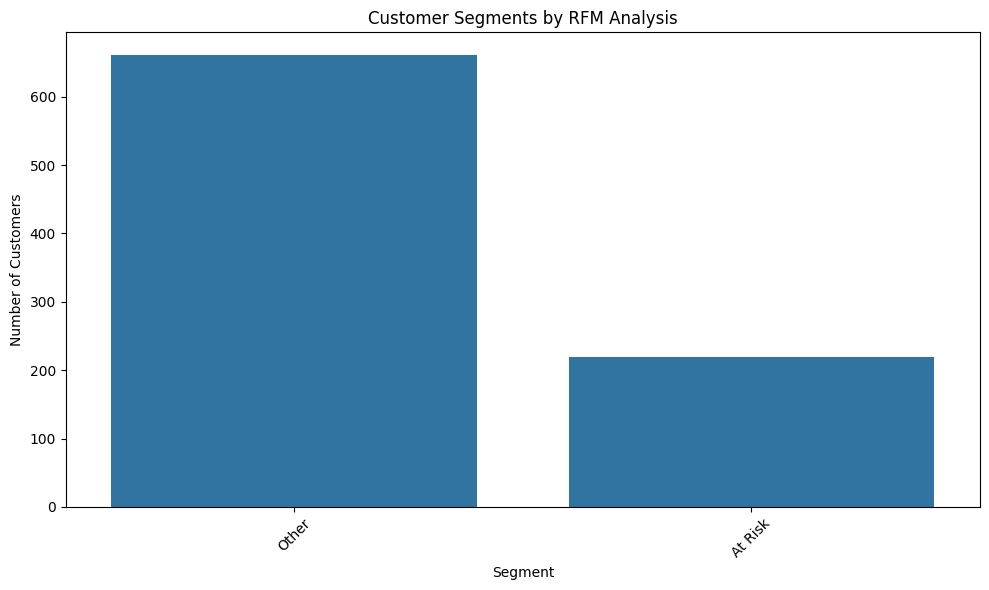

In [11]:
# Perform RFM analysis
def perform_rfm_analysis(df):
    # Use the most recent date in the dataset as the reference date
    # make sure 'LastPurchaseDate' is in datetime format
    df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'], errors='coerce')
    max_date = df['LastPurchaseDate'].max()
    
    # Calculate RFM metrics
    rfm = df.groupby('CustomerID').agg({
        'LastPurchaseDate': lambda x: (max_date - x.max()).total_seconds() / (3600*24),  # Recency in days
        'TotalPurchases': 'count',  # Frequency
        'SocialMediaEngagement': lambda x: len(x.unique())  # Monetary (using number of stores as proxy)
    }).rename(columns={
        'LastPurchaseDate': 'Recency',
        'TotalPurchases': 'Frequency',
        'SocialMediaEngagement': 'Monetary'
    })
    
    # Create RFM segments with error handling
    try:
        rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=range(4, 0, -1), duplicates='drop')
    except ValueError:
        # If qcut fails, use simple ranking
        rfm['R_Quartile'] = pd.cut(rfm['Recency'], 4, labels=range(4, 0, -1))
    
    try:
        rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], 4, labels=range(1, 5), duplicates='drop')
    except ValueError:
        rfm['F_Quartile'] = pd.cut(rfm['Frequency'], 4, labels=range(1, 5))
    
    try:
        rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], 4, labels=range(1, 5), duplicates='drop')
    except ValueError:
        rfm['M_Quartile'] = pd.cut(rfm['Monetary'], 4, labels=range(1, 5))
    
    # Combine RFM scores
    rfm['RFM_Score'] = rfm['R_Quartile'].astype(str) + rfm['F_Quartile'].astype(str) + rfm['M_Quartile'].astype(str)
    
    # Define customer segments
    segment_map = {
        r'[4][4-5][4-5]': 'Champions',
        r'[3][3-5][3-5]': 'Loyal Customers',
        r'[1-2][4-5][4-5]': 'Potential Loyalists',
        r'[1-2][3][2-3]': 'New Customers',
        r'[1][1-2][1-2]': 'At Risk'
    }
    
    rfm['Segment'] = 'Other'
    for pattern, segment in segment_map.items():
        rfm.loc[rfm['RFM_Score'].str.contains(pattern), 'Segment'] = segment
    
    return rfm

# Perform RFM analysis
rfm_analysis = perform_rfm_analysis(df)
print("RFM Customer Segmentation:")
print(rfm_analysis.head())

# Visualize customer segments
plt.figure(figsize=(10, 6))
segment_counts = rfm_analysis['Segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Customer Segments by RFM Analysis')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/rfm_segments.png')

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
# You can download from: https://www.kaggle.com/c/titanic/data
df = pd.read_csv('../data/exam/processed/merged_data_with_ratings.csv')

In [2]:
# Display basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              880 non-null    object 
 1   Age                     880 non-null    object 
 2   Gender                  880 non-null    object 
 3   Location                880 non-null    object 
 4   MembershipLevel         880 non-null    object 
 5   TotalPurchases          880 non-null    int64  
 6   TotalSpent              880 non-null    float64
 7   FavoriteCategory        859 non-null    object 
 8   LastPurchaseDate        879 non-null    object 
 9   WebsiteClickRate        880 non-null    float64
 10  TimeSpentOnSite         880 non-null    float64
 11  SocialMediaEngagement   880 non-null    object 
 12  AdClickHistory          808 non-null    object 
 13  GeneratedReview         878 non-null    object 
 14  CustomerSentimentScore  880 

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4


In [3]:
# Data preprocessing
# Handle missing values
df['Gender_new'] = df['Age']
display(df.head())
# create a new column 'Age_new' and fill it with random values range from 18 to 76
df['Age_new'] = np.random.randint(18, 76, size=len(df))

# remove $sign from 'TotalSpend' and convert it to float
df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# remove TotalSpend that is not a number and bfill it with the previous value
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_18824\1217612237.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment,Gender_new
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5,Female
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4,Male
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5,Other
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2,Male
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4,Female


In [4]:
# Encode categorical variables
le = LabelEncoder()
df['MembershipLevel'] = le.fit_transform(df['MembershipLevel'])
df['FavoriteCategory'] = le.fit_transform(df['FavoriteCategory'])
df['SocialMediaEngagement'] = le.fit_transform(df['SocialMediaEngagement'])
df['AdClickHistory'] = le.fit_transform(df['AdClickHistory'])
df['PersonaTag'] = le.fit_transform(df['PersonaTag'])
df['Gender_new'] = le.fit_transform(df['Gender_new'])

# Select features for the model
features = [
    'Age_new', 'Gender_new', 'MembershipLevel', 'TotalPurchases',
    'TotalSpent', 'FavoriteCategory', 'SocialMediaEngagement',
    'TimeSpentOnSite', 'WebsiteClickRate', 'AdClickHistory',
    'CustomerSentimentScore', 'PersonaTag', 'llm_sentiment'
]
X = df[features]
y = df['Churn']

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train the logistic regression model
lr_model = DecisionTreeClassifier(random_state=42, max_depth=5)
lr_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

In [9]:
# Model evaluation
print("\n=== MODEL EVALUATION ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== MODEL EVALUATION ===
Accuracy: 0.9091
ROC AUC Score: 0.9426

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        99
           1       0.90      0.90      0.90        77

    accuracy                           0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



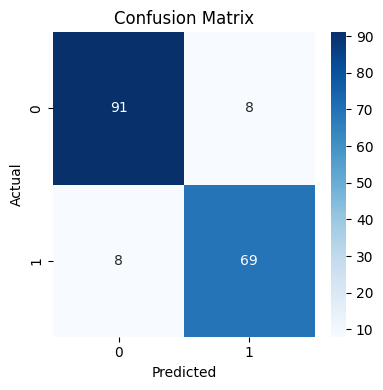

In [10]:
# Confusion Matrix
plt.figure(figsize=(4, 4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('../images/decision_tree_confusion_matrix.png')

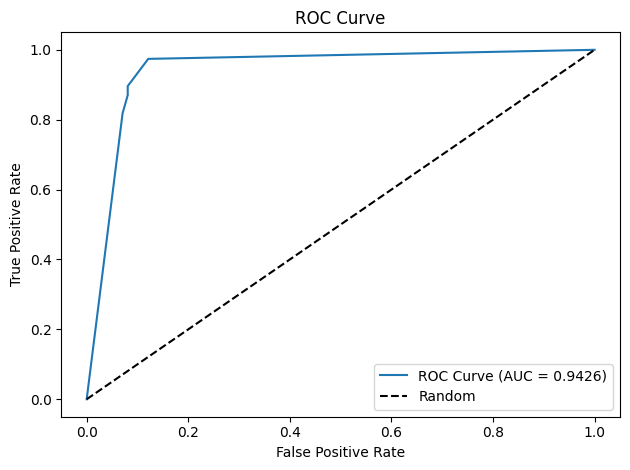

In [11]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.savefig('../images/decision_tree_model_roc.png')

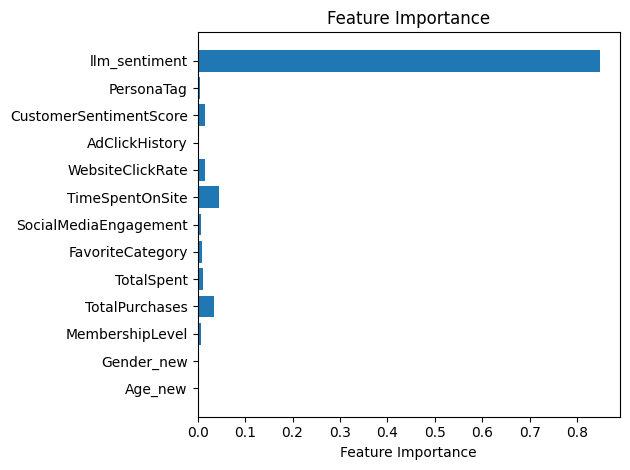

In [12]:
# Feature importance
feature_importance = lr_model.feature_importances_
feature_names = features
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')

plt.tight_layout()
plt.savefig('../images/decision_tree_model_feature.png')

In [13]:
# Additional evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

print("\n=== ADDITIONAL METRICS ===")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


=== ADDITIONAL METRICS ===
Precision: 0.8961
Recall: 0.8961
F1-Score: 0.8961


In [14]:
# Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Feature importance interpretation (Decision Tree uses feature importance, not coefficients)
print("\n=== FEATURE IMPORTANCE ===")
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': lr_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df)


Cross-validation scores: [0.95744681 0.95744681 0.97163121 0.96453901 0.93571429]
Mean CV accuracy: 0.9574 (+/- 0.0241)

=== FEATURE IMPORTANCE ===
                   Feature  Importance
12           llm_sentiment    0.847780
7          TimeSpentOnSite    0.044831
3           TotalPurchases    0.034173
10  CustomerSentimentScore    0.016341
8         WebsiteClickRate    0.015175
4               TotalSpent    0.011350
5         FavoriteCategory    0.009238
6    SocialMediaEngagement    0.007190
2          MembershipLevel    0.007095
11              PersonaTag    0.005493
0                  Age_new    0.001334
1               Gender_new    0.000000
9           AdClickHistory    0.000000


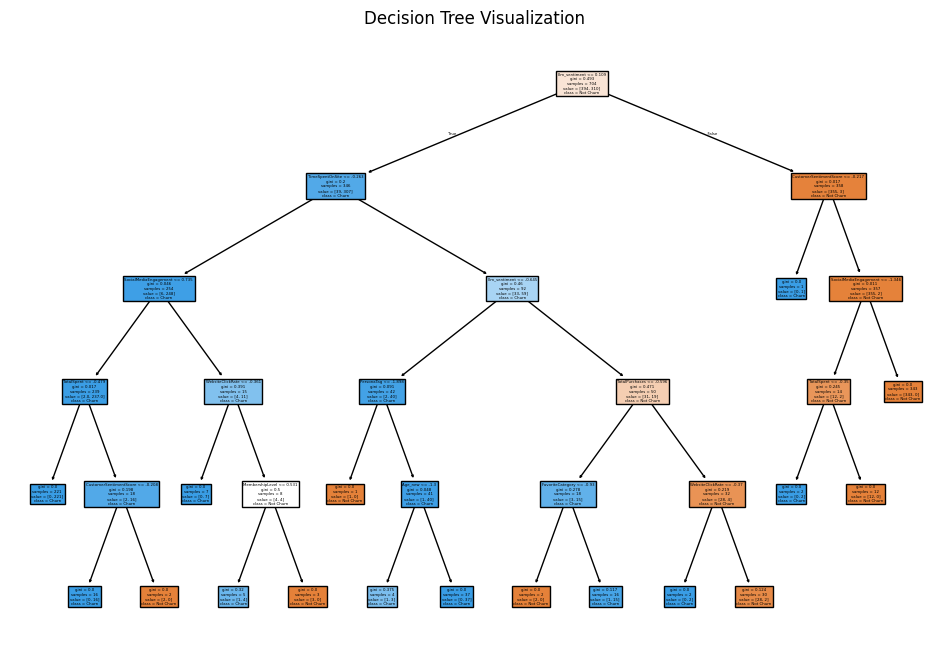

In [15]:
# plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(lr_model, feature_names=features, class_names=['Not Churn', 'Churn'], filled=True)
plt.title('Decision Tree Visualization')
plt.savefig('../images/decision_tree.png')

In [50]:
# import libraries
import pandas as pd
import warnings


# turn off warnings
warnings.filterwarnings("ignore")

In [51]:
# load the data
df = pd.read_csv('../data/exam/processed/merged_data_with_ratings.csv')

# preview the data
display(df.head())

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Data preprocessing
# Handle missing values
df['Gender_new'] = df['Age']
display(df.head())
# create a new column 'Age_new' and fill it with random values range from 18 to 76
df['Age_new'] = np.random.randint(18, 76, size=len(df))

# remove $sign from 'TotalSpend' and convert it to float
df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# remove TotalSpend that is not a number and bfill it with the previous value
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment,Gender_new
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5,Female
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4,Male
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5,Other
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2,Male
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4,Female


In [54]:
# Data preprocessing
# Handle missing values
df['Gender_new'] = df['Age']
display(df.head())
# create a new column 'Age_new' and fill it with random values range from 18 to 76
df['Age_new'] = np.random.randint(18, 76, size=len(df))

# remove $sign from 'TotalSpend' and convert it to float
df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# remove TotalSpend that is not a number and bfill it with the previous value
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment,Gender_new,Age_new
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5,Female,24
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4,Male,63
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5,Other,39
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2,Male,27
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4,Female,36


In [55]:
# Encode categorical variables
le = LabelEncoder()
df['MembershipLevel'] = le.fit_transform(df['MembershipLevel'])
df['FavoriteCategory'] = le.fit_transform(df['FavoriteCategory'])
df['SocialMediaEngagement'] = le.fit_transform(df['SocialMediaEngagement'])
df['AdClickHistory'] = le.fit_transform(df['AdClickHistory'])
df['PersonaTag'] = le.fit_transform(df['PersonaTag'])
df['Gender_new'] = le.fit_transform(df['Gender_new'])

# Select features for the model
features = [
    'Age_new', 'Gender_new', 'MembershipLevel', 'TotalPurchases',
    'TotalSpent', 'FavoriteCategory', 'SocialMediaEngagement',
    'TimeSpentOnSite', 'WebsiteClickRate', 'AdClickHistory',
    'CustomerSentimentScore', 'PersonaTag', 'llm_sentiment'
]
X = df[features]
y = df['Churn']

In [56]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

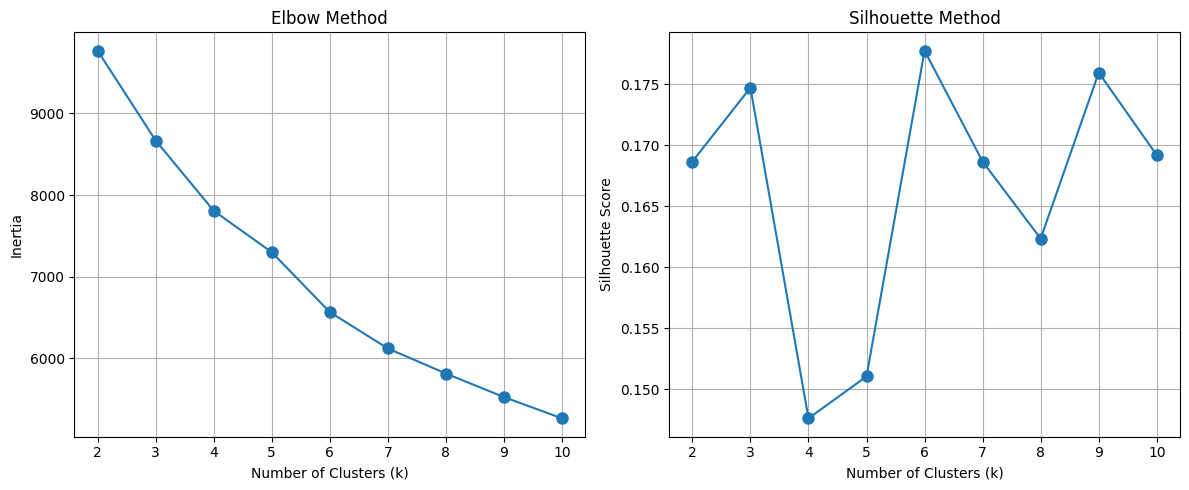

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use the scaled features that you've already prepared
X = X_scaled.copy()

# Determine optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score (only valid for k >= 2)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Elbow Method results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.savefig("../images/elbow_silhouette_plot.png")

In [2]:
# configure api
from dotenv import load_dotenv
import os
from google import genai
from IPython.display import display, Markdown

load_dotenv()
gemini_api_key = os.getenv("GEMINI_API_KEY")

client = genai.Client(api_key=gemini_api_key)

model = [
    "gemini-2.5-flash-preview-04-17-thinking"
]

In [59]:
# Using AI to interpret the confusion matrices
from google.genai import types

with open('../images/elbow_silhouette_plot.png', 'rb') as image_file:
    questionnaire_responses_mood_word_cloud = image_file.read()

# prompt powered by grok-3
prompt = """
You are a data scientist expert, in one paragraph what is the best number of clusters for the dataset based on the Elbow Method and Silhouette Method results.
"""

response = client.models.generate_content(
    model=model[0], 
    contents=[
        types.Part.from_bytes(
            data=questionnaire_responses_mood_word_cloud,
            mime_type='image/png',
        ),
        prompt
    ]
)

display(Markdown(response.text))

Based on the provided plots, the Elbow Method suggests that a reasonable number of clusters could be around k=4 or k=5, as the rate of decrease in inertia begins to slow down significantly around these points, forming an "elbow". The Silhouette Method, which measures how similar an object is to its own cluster compared to other clusters, indicates that the highest silhouette score is achieved at k=6. While there isn't perfect agreement between the two methods, the silhouette score provides a more quantitative measure of cluster quality, suggesting that k=6 results in the best-defined clusters in terms of separation and compactness. Therefore, considering both analyses, k=6 is the most strongly supported number of clusters based on these metrics.


Cluster Centers (Original Scale):


,Age_new,Gender_new,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,SocialMediaEngagement,TimeSpentOnSite,WebsiteClickRate,AdClickHistory,CustomerSentimentScore,PersonaTag,llm_sentiment
Cluster,,,,,,,,,,,,,
0,46.968504,21.078740,0.070866,4.551181,120.196142,13.133858,6.787402,8.448425,0.519055,54.818898,2.656693,45.039370,2.173228
1,46.600746,30.451493,1.507463,71.104478,4371.467873,12.097015,47.776119,76.503358,1.494205,56.735075,1.660933,57.880597,4.750000
2,44.268595,20.809917,2.884298,15.962810,540.631777,10.545455,44.342975,19.859504,0.643095,62.615702,0.960331,39.975207,3.165289
3,52.000000,18.400000,2.250000,20.800000,1455.192500,14.300000,27.550000,14.555000,11.240000,64.850000,84.150000,43.250000,4.150000
4,46.668161,25.869955,0.197309,6.820628,272.632108,15.035874,56.192825,7.502691,0.225861,67.112108,0.692422,41.107623,2.452915



Percentage of churn (1) in each cluster:


Churn,0,1
Cluster,,
0,7.086614,92.913386
1,100.000000,0.000000
2,64.462810,35.537190
3,80.000000,20.000000
4,19.730942,80.269058


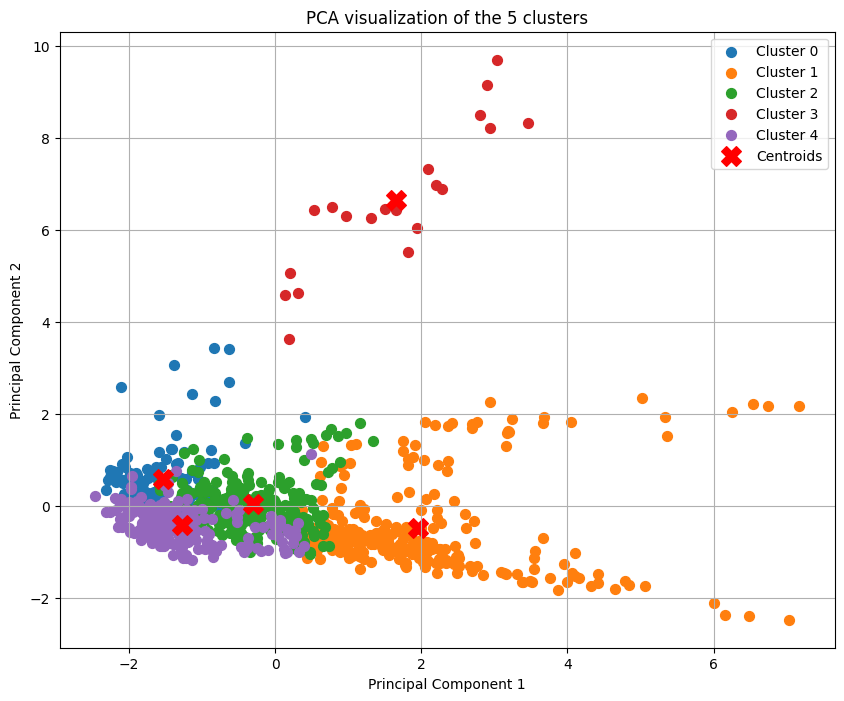

In [60]:
# Based on the elbow method and silhouette scores, choose optimal k

optimal_k = 5

# Apply K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Examine cluster characteristics - only use the numeric features that were used in clustering
cluster_stats = df.groupby('Cluster')[features].mean()
print("\nCluster Centers (Original Scale):")
display(cluster_stats)

# Visualize clusters using PCA to reduce to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
for i in range(optimal_k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], 
                label=f'Cluster {i}', s=50)

plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, marker='X', c='red', label='Centroids')

plt.title(f'PCA visualization of the {optimal_k} clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig("../images/pca_clusters.png")

# Examine relationship between clusters and churn outcome
cluster_outcome = pd.crosstab(df['Cluster'], df['Churn'], normalize='index') * 100
print("\nPercentage of churn (1) in each cluster:")
display(cluster_outcome)

In [4]:
# Using AI to interpret the confusion matrices
from google.genai import types

with open('../images/pca_clusters.png', 'rb') as image_file:
    questionnaire_responses_mood_word_cloud = image_file.read()

# prompt powered by grok-3
prompt = """
You are a data scientist expert, in one paragraph what is the best number of clusters for the dataset based on the Elbow Method and Silhouette Method results.
"""

response = client.models.generate_content(
    model=model[0], 
    contents=[
        types.Part.from_bytes(
            data=questionnaire_responses_mood_word_cloud,
            mime_type='image/png',
        ),
        prompt
    ]
)

display(Markdown(response.text))

Based on the provided image, which is a PCA visualization of a clustering result using 5 clusters, it is shown how data points and their assigned centroids are distributed in a 2D space. However, this plot alone does not provide the necessary information from standard metrics like the Elbow Method or the Silhouette Method to definitively determine the *optimal* number of clusters for the dataset. The Elbow Method typically looks for a point where the rate of decrease in inertia sharply changes, while the Silhouette Method assesses how well each point fits its cluster compared to others; the results of these methods are usually presented as separate plots or scores for varying numbers of clusters, which are not included here. Therefore, without access to the actual results from the Elbow Method and Silhouette Method, it is not possible to conclude what the best number of clusters is based on those criteria, although the plot visualizes the spatial separation achieved with a 5-cluster solution.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
# You can download from: https://www.kaggle.com/c/titanic/data
df = pd.read_csv('../data/exam/processed/merged_data_with_ratings.csv')

In [31]:
# Display basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              880 non-null    object 
 1   Age                     880 non-null    object 
 2   Gender                  880 non-null    object 
 3   Location                880 non-null    object 
 4   MembershipLevel         880 non-null    object 
 5   TotalPurchases          880 non-null    int64  
 6   TotalSpent              880 non-null    float64
 7   FavoriteCategory        859 non-null    object 
 8   LastPurchaseDate        879 non-null    object 
 9   WebsiteClickRate        880 non-null    float64
 10  TimeSpentOnSite         880 non-null    float64
 11  SocialMediaEngagement   880 non-null    object 
 12  AdClickHistory          808 non-null    object 
 13  GeneratedReview         878 non-null    object 
 14  CustomerSentimentScore  880 

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4


In [32]:
# Data preprocessing
# Handle missing values
df['Gender_new'] = df['Age']
display(df.head())
# create a new column 'Age_new' and fill it with random values range from 18 to 76
df['Age_new'] = np.random.randint(18, 76, size=len(df))

# remove $sign from 'TotalSpend' and convert it to float
df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# remove TotalSpend that is not a number and bfill it with the previous value
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_12828\1217612237.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment,Gender_new
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5,Female
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4,Male
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5,Other
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2,Male
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4,Female


In [33]:
# Encode categorical variables
le = LabelEncoder()
df['MembershipLevel'] = le.fit_transform(df['MembershipLevel'])
df['FavoriteCategory'] = le.fit_transform(df['FavoriteCategory'])
df['SocialMediaEngagement'] = le.fit_transform(df['SocialMediaEngagement'])
df['AdClickHistory'] = le.fit_transform(df['AdClickHistory'])
df['PersonaTag'] = le.fit_transform(df['PersonaTag'])
df['Gender_new'] = le.fit_transform(df['Gender_new'])

# Select features for the model
features = [
    'Age_new', 'Gender_new', 'MembershipLevel', 'TotalPurchases',
    'TotalSpent', 'FavoriteCategory', 'SocialMediaEngagement',
    'TimeSpentOnSite', 'WebsiteClickRate', 'AdClickHistory',
    'CustomerSentimentScore', 'PersonaTag', 'llm_sentiment'
]
X = df[features]
y = df['Churn']

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Import necessary libraries for modeling
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pickle
import os

# Create directory for model storage if it doesn't exist
os.makedirs('models', exist_ok=True)

# Dictionary to store model results for later evaluation
model_results = {}


In [37]:
# ---- Random Forest ----
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_train_preds = rf_model.predict(X_train_scaled)
rf_test_preds = rf_model.predict(X_test_scaled)
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]

# Store results
model_results['random_forest'] = {
    'train_preds': rf_train_preds,
    'test_preds': rf_test_preds,
    'test_proba': rf_test_proba
}

# Save the model
with open('models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Random Forest model trained and saved!")


Training Random Forest model...
Random Forest model trained and saved!


c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [38]:
# ---- XGBoost ----
print("Training XGBoost model...")
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_train_preds = xgb_model.predict(X_train_scaled)
xgb_test_preds = xgb_model.predict(X_test_scaled)
xgb_test_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Store results
model_results['xgboost'] = {
    'train_preds': xgb_train_preds,
    'test_preds': xgb_test_preds,
    'test_proba': xgb_test_proba
}

# Save the model
with open('models/xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("XGBoost model trained and saved!")


Training XGBoost model...
XGBoost model trained and saved!


In [39]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier

print("Training AdaBoost model...")
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)

# Make predictions
ada_train_preds = ada_model.predict(X_train_scaled)
ada_test_preds = ada_model.predict(X_test_scaled)
ada_test_proba = ada_model.predict_proba(X_test_scaled)[:, 1]

# Store results
model_results['adaboost'] = {
    'train_preds': ada_train_preds,
    'test_preds': ada_test_preds,
    'test_proba': ada_test_proba
}

# Save the model
with open('models/adaboost_model.pkl', 'wb') as f:
    pickle.dump(ada_model, f)

print("AdaBoost model trained and saved!")

Training AdaBoost model...
AdaBoost model trained and saved!


In [40]:
with open('models/model_results.pkl', 'wb') as f:
    pickle.dump(model_results, f)

In [41]:
# Create a function to evaluate and display results
def evaluate_model(y_true, y_pred, y_proba=None):
    """Evaluate model performance with multiple metrics"""
    results = {}
    results['accuracy'] = accuracy_score(y_true, y_pred)
    results['precision'] = precision_score(y_true, y_pred, zero_division=0)
    results['recall'] = recall_score(y_true, y_pred, zero_division=0)
    results['f1'] = f1_score(y_true, y_pred, zero_division=0)
    
    if y_proba is not None:
        results['auc'] = roc_auc_score(y_true, y_proba)
    
    return results

In [42]:
# Update the models list to include the FT Transformer
models = ['random_forest', 'xgboost', 'adaboost']

# Recalculate evaluation results for all models including FT Transformer
evaluation_results = {}

for model in models:
    test_preds = model_results[model]['test_preds']
    test_proba = model_results[model]['test_proba']
    evaluation_results[model] = evaluate_model(y_test, test_preds, test_proba)

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(evaluation_results).T
display(results_df.style.highlight_max(axis=0))

,accuracy,precision,recall,f1,auc
random_forest,0.960227,0.937500,0.974026,0.955414,0.677883
xgboost,0.437500,0.437500,1.000000,0.608696,0.526630
adaboost,0.960227,0.937500,0.974026,0.955414,0.991342


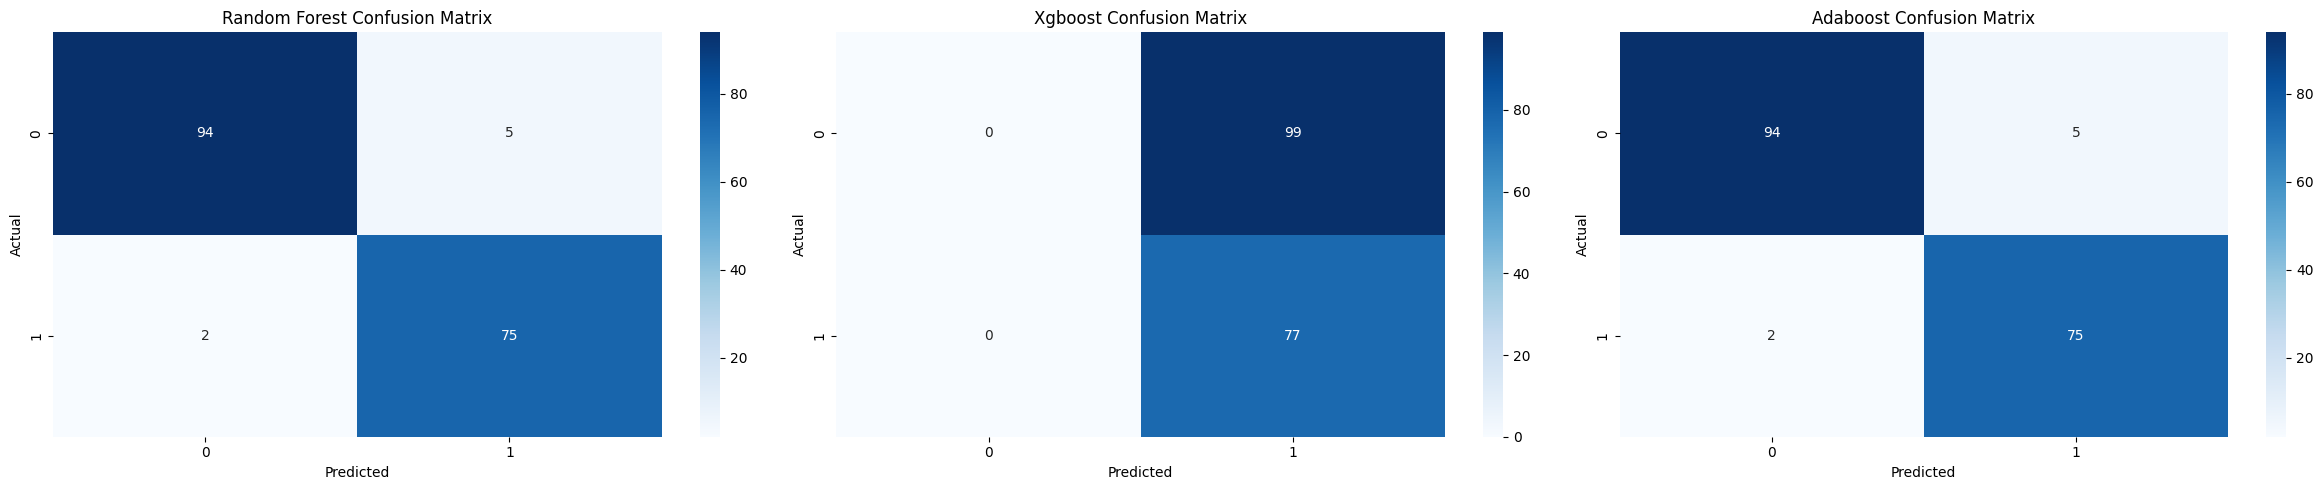

In [43]:
# Redraw confusion matrices with FT Transformer
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, model_results[model]['test_preds'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model.replace("_", " ").title()} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('../images/ml_confusion_matrices.png', dpi=300)

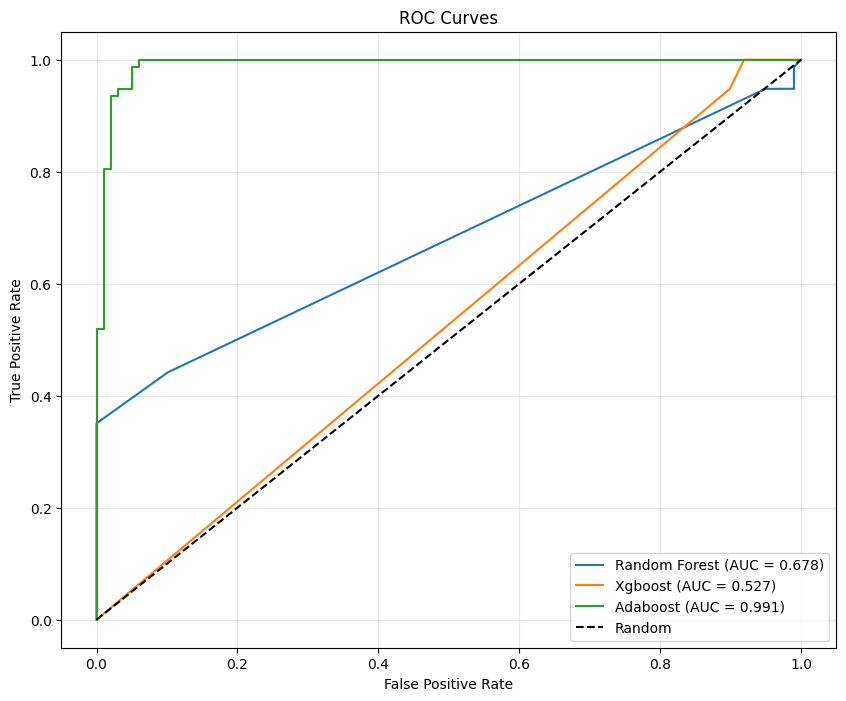

In [44]:
# Redraw ROC curves including FT Transformer
plt.figure(figsize=(10, 8))

for model in models:
    y_proba = model_results[model]['test_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model.replace("_", " ").title()} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../images/ml_roc_curves.png', dpi=300)

# Market Basket Analysis for Multi-Store Retail Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import ast
import networkx as nx

# Set display options
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [12, 8]

# Load the dataset
# Assuming data is in a CSV file
df = pd.read_csv('../data/sample-2/processed/transaction_baskets.csv')

# Display first few rows
print("Original data sample:")
display(df.head())

# Check basic information
print("\nDataset info:")
print(df.info())

Original data sample:


,StoreID,TransactionID,ProductID,ProductName,ProductCategory
0,1,10000,['P105'],['Product P105'],['Electronics']
1,1,10001,"['P147', 'P132', 'P110']","['Product P147', 'Product P132', 'Product P110']","['Grocery', 'Electronics', 'Books']"
2,1,10002,"['P130', 'P107', 'P109']","['Product P130', 'Product P107', 'Product P109']","['Electronics', 'Electronics', 'Books']"
3,1,10003,"['P140', 'P144', 'P143', 'P144', 'P138', 'P112...","['Product P140', 'Product P144', 'Product P143...","['Grocery', 'Grocery', 'Books', 'Grocery', 'Ho..."
4,1,10004,"['P131', 'P100', 'P104', 'P114', 'P117']","['Product P131', 'Product P100', 'Product P104...","['Grocery', 'Grocery', 'Apparel', 'Apparel', '..."



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   StoreID          15096 non-null  int64 
 1   TransactionID    15096 non-null  int64 
 2   ProductID        15096 non-null  object
 3   ProductName      15096 non-null  object
 4   ProductCategory  15096 non-null  object
dtypes: int64(2), object(3)
memory usage: 589.8+ KB
None


## Preprocessing

In [2]:
# Convert string representations of lists to actual lists if needed
def convert_to_list(x):
    if isinstance(x, str):
        return ast.literal_eval(x)
    return x

df['ProductID'] = df['ProductID'].apply(convert_to_list)
df['ProductName'] = df['ProductName'].apply(convert_to_list)
df['ProductCategory'] = df['ProductCategory'].apply(convert_to_list)

# Check data after conversion
print("\nAfter conversion:")
display(df.head())

# Basic statistics
print(f"\nTotal stores: {df['StoreID'].nunique()}")
print(f"Total transactions: {df['TransactionID'].nunique()}")

# Count transactions per store
store_transactions = df.groupby('StoreID').size()
print("\nTransactions per store:")
print(store_transactions)


After conversion:


,StoreID,TransactionID,ProductID,ProductName,ProductCategory
0,1,10000,[P105],[Product P105],[Electronics]
1,1,10001,"[P147, P132, P110]","[Product P147, Product P132, Product P110]","[Grocery, Electronics, Books]"
2,1,10002,"[P130, P107, P109]","[Product P130, Product P107, Product P109]","[Electronics, Electronics, Books]"
3,1,10003,"[P140, P144, P143, P144, P138, P112, P123, P122]","[Product P140, Product P144, Product P143, Pro...","[Grocery, Grocery, Books, Grocery, Home Goods,..."
4,1,10004,"[P131, P100, P104, P114, P117]","[Product P131, Product P100, Product P104, Pro...","[Grocery, Grocery, Apparel, Apparel, Electronics]"



Total stores: 8
Total transactions: 15096

Transactions per store:
StoreID
1    1544
2    2267
3    2092
4    1894
5    1807
6    2010
7    1790
8    1692
dtype: int64


## Exploration

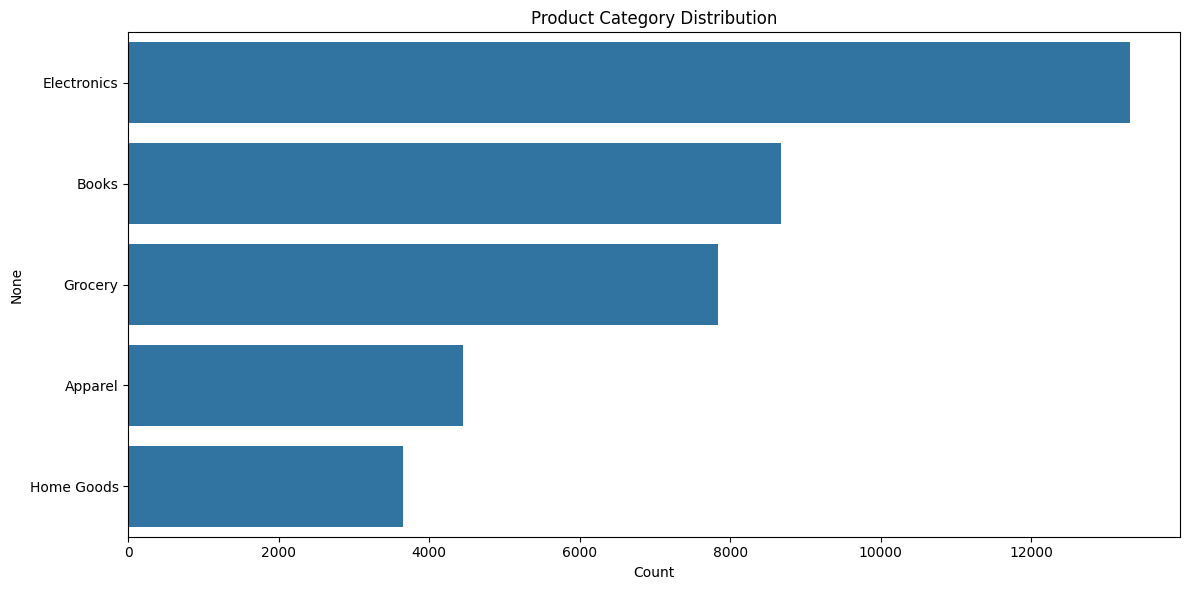

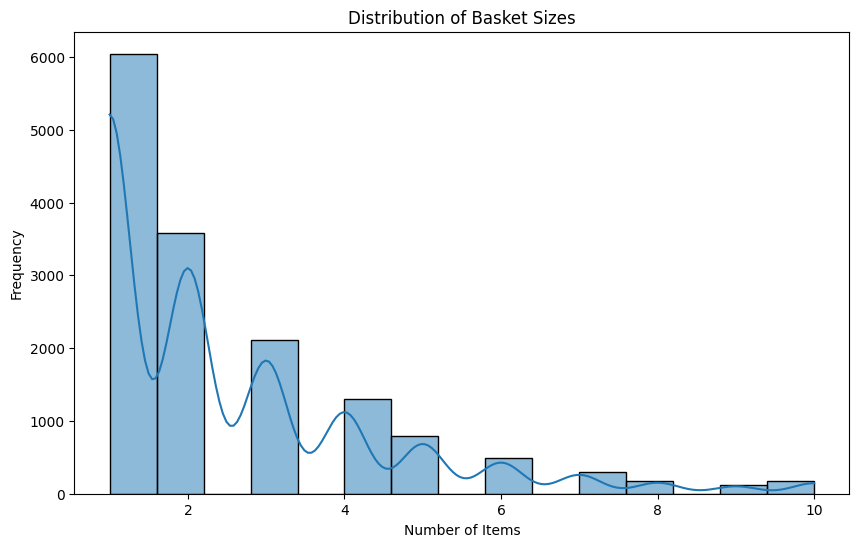

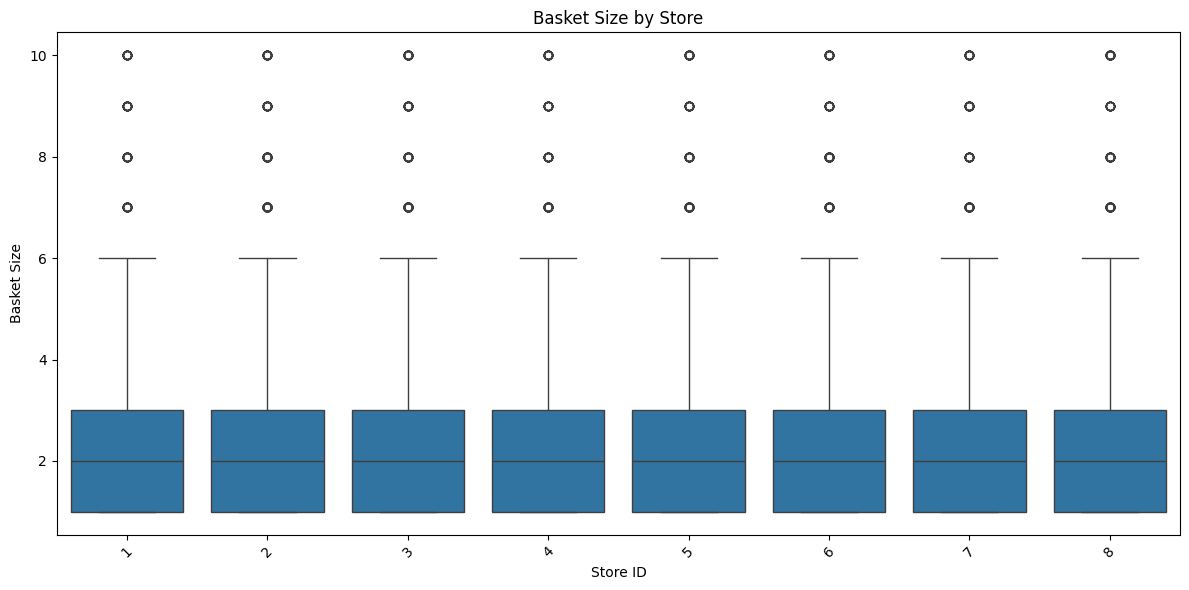

In [3]:
# Analyze product categories across stores
all_categories = []
for categories in df['ProductCategory']:
    all_categories.extend(categories)

category_counts = pd.Series(all_categories).value_counts()

# Plot category distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig('../images/product_category_distribution.png')

# Analyze basket sizes
df['BasketSize'] = df['ProductID'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['BasketSize'], bins=15, kde=True)
plt.title('Distribution of Basket Sizes')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')

# Compare basket sizes across stores
plt.figure(figsize=(12, 6))
sns.boxplot(x='StoreID', y='BasketSize', data=df)
plt.title('Basket Size by Store')
plt.xlabel('Store ID')
plt.ylabel('Basket Size')
plt.xticks(rotation=45)
plt.tight_layout()  


## Prepare Data for Market Basket Analysis

In [4]:
# Function to prepare data for a specific store
def prepare_store_data(store_id):
    # Filter data for the specific store
    store_data = df[df['StoreID'] == store_id]
    
    # Create transactions list using product names
    transactions = store_data['ProductName'].tolist()
    
    # Convert transactions to one-hot encoded format
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
    
    return store_data, transactions, df_encoded

# Prepare data for all stores
store_data_dict = {}
for store_id in df['StoreID'].unique():
    store_data, transactions, df_encoded = prepare_store_data(store_id)
    store_data_dict[store_id] = {
        'data': store_data,
        'transactions': transactions,
        'encoded': df_encoded
    }
    
    print(f"Store {store_id}: {len(transactions)} transactions prepared")

Store 1: 1544 transactions prepared
Store 2: 2267 transactions prepared
Store 3: 2092 transactions prepared
Store 4: 1894 transactions prepared
Store 5: 1807 transactions prepared
Store 6: 2010 transactions prepared
Store 7: 1790 transactions prepared
Store 8: 1692 transactions prepared


## Apply Apriori Algorithm and Generate Association Rules

In [5]:
# Function to perform market basket analysis
def run_mba(df_encoded, min_support=0.01, min_threshold=1.0):
    # Apply Apriori algorithm
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    
    # Add length of itemsets
    if not frequent_itemsets.empty:
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)
        
        # Generate association rules
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)
        
        # Sort rules by lift
        if not rules.empty:
            rules = rules.sort_values('lift', ascending=False)
        
        return frequent_itemsets, rules
    
    return frequent_itemsets, pd.DataFrame()

# Run analysis for each store
results = {}
for store_id, data in store_data_dict.items():
    print(f"\nAnalyzing Store {store_id}...")
    
    # Adjust min_support based on number of transactions
    transactions_count = len(data['transactions'])
    min_support = max(2 / transactions_count, 0.01)  # At least 2 transactions or 1%
    
    frequent_itemsets, rules = run_mba(data['encoded'], min_support=min_support)
    
    results[store_id] = {
        'frequent_itemsets': frequent_itemsets,
        'rules': rules
    }
    
    print(f"Found {len(frequent_itemsets)} frequent itemsets with min_support={min_support:.4f}")
    print(f"Generated {len(rules)} association rules")


Analyzing Store 1...
Found 61 frequent itemsets with min_support=0.0100
Generated 32 association rules

Analyzing Store 2...
Found 56 frequent itemsets with min_support=0.0100
Generated 22 association rules

Analyzing Store 3...
Found 57 frequent itemsets with min_support=0.0100
Generated 24 association rules

Analyzing Store 4...
Found 50 frequent itemsets with min_support=0.0100
Generated 10 association rules

Analyzing Store 5...
Found 54 frequent itemsets with min_support=0.0100
Generated 18 association rules

Analyzing Store 6...
Found 54 frequent itemsets with min_support=0.0100
Generated 18 association rules

Analyzing Store 7...
Found 75 frequent itemsets with min_support=0.0100
Generated 58 association rules

Analyzing Store 8...
Found 68 frequent itemsets with min_support=0.0100
Generated 46 association rules


## Visualize and Interpret Results


Top 10 Association Rules for Store 1:
   If customer buys They also buy   Support  Confidence      Lift
0      Product P144  Product P103  0.014249    0.146667  1.952184
1      Product P103  Product P144  0.014249    0.189655  1.952184
3      Product P108  Product P144  0.014249    0.171875  1.769167
2      Product P144  Product P108  0.014249    0.146667  1.769167
6      Product P103  Product P149  0.012306    0.163793  1.674812
7      Product P149  Product P103  0.012306    0.125828  1.674812
5      Product P106  Product P149  0.012953    0.151515  1.549268
4      Product P149  Product P106  0.012953    0.132450  1.549268
20     Product P108  Product P106  0.010363    0.125000  1.462121
21     Product P106  Product P108  0.010363    0.121212  1.462121


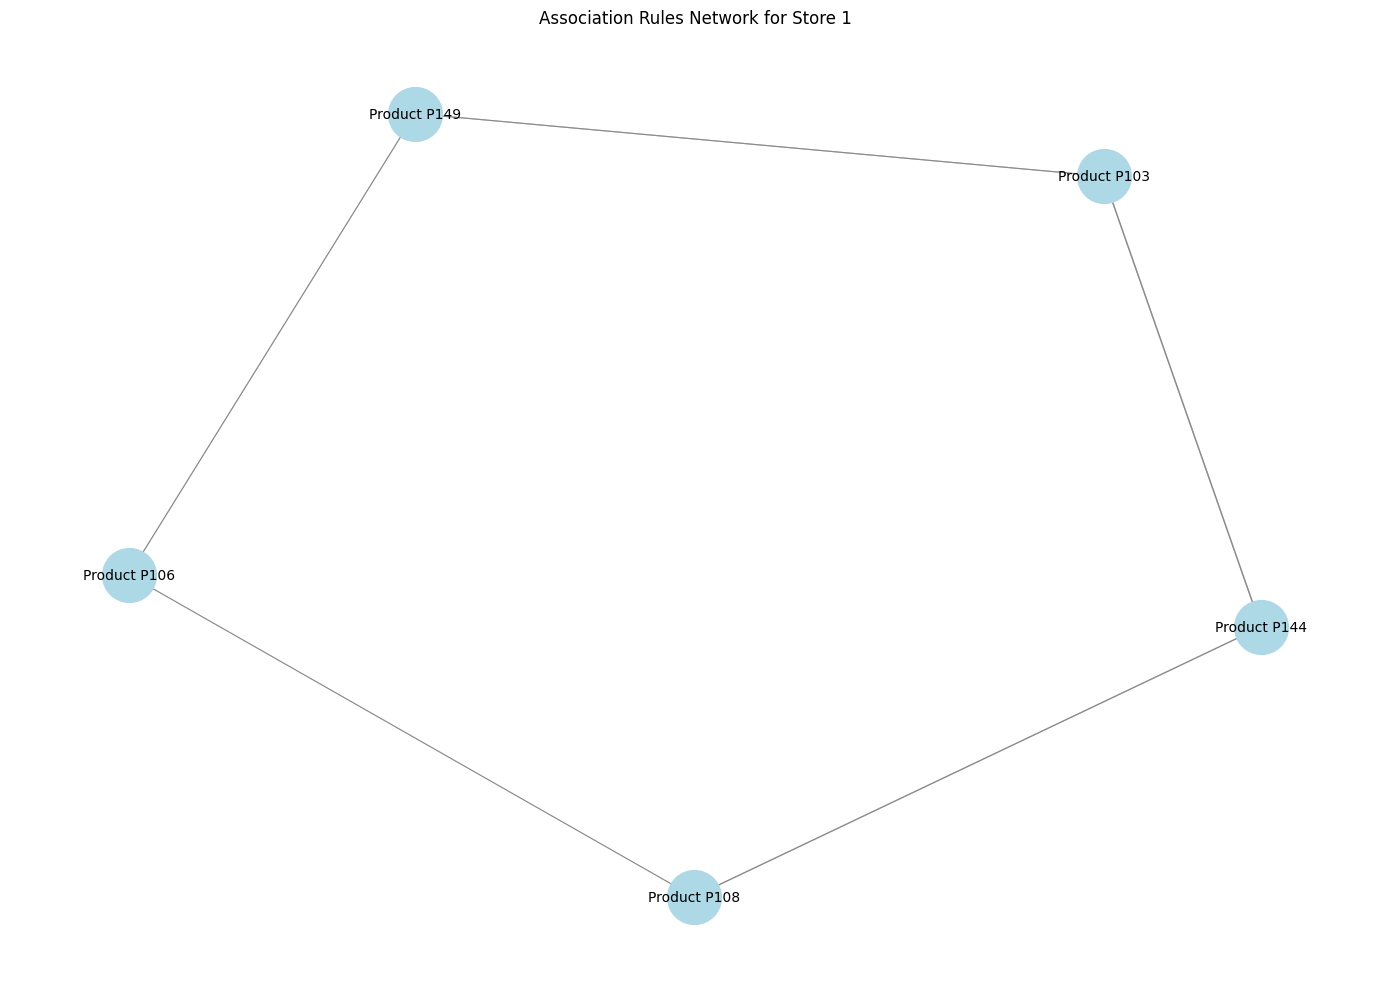

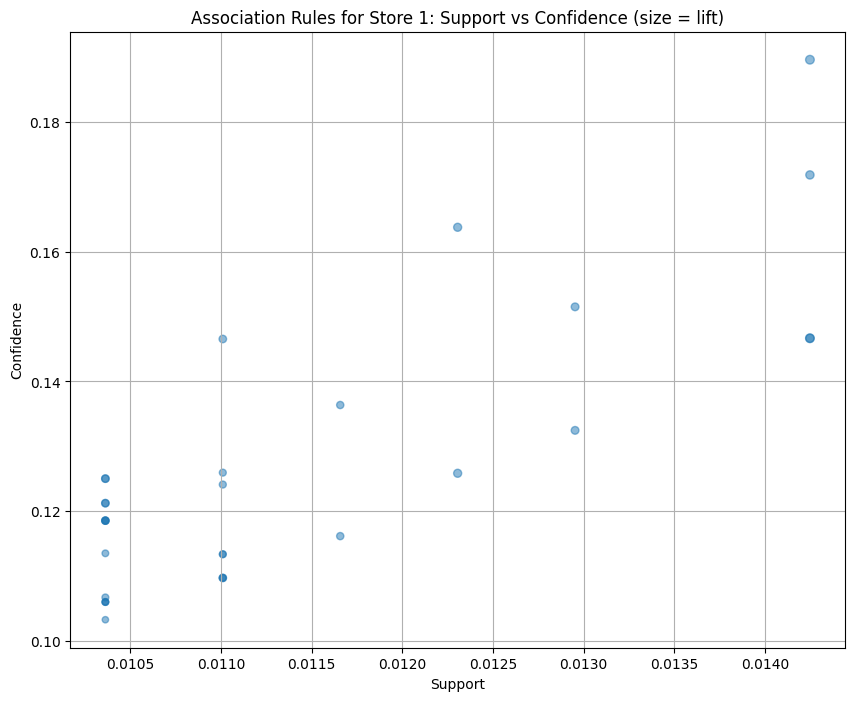


Top 10 Association Rules for Store 2:
   If customer buys They also buy   Support  Confidence      Lift
11     Product P125  Product P149  0.010587    0.172662  2.007305
10     Product P149  Product P125  0.010587    0.123077  2.007305
19     Product P106  Product P115  0.010146    0.113300  1.888619
18     Product P115  Product P106  0.010146    0.169118  1.888619
13     Product P149  Product P127  0.010587    0.123077  1.508191
12     Product P127  Product P149  0.010587    0.129730  1.508191
1      Product P106  Product P105  0.011910    0.133005  1.478050
0      Product P105  Product P106  0.011910    0.132353  1.478050
7      Product P127  Product P105  0.010587    0.129730  1.441653
6      Product P105  Product P127  0.010587    0.117647  1.441653


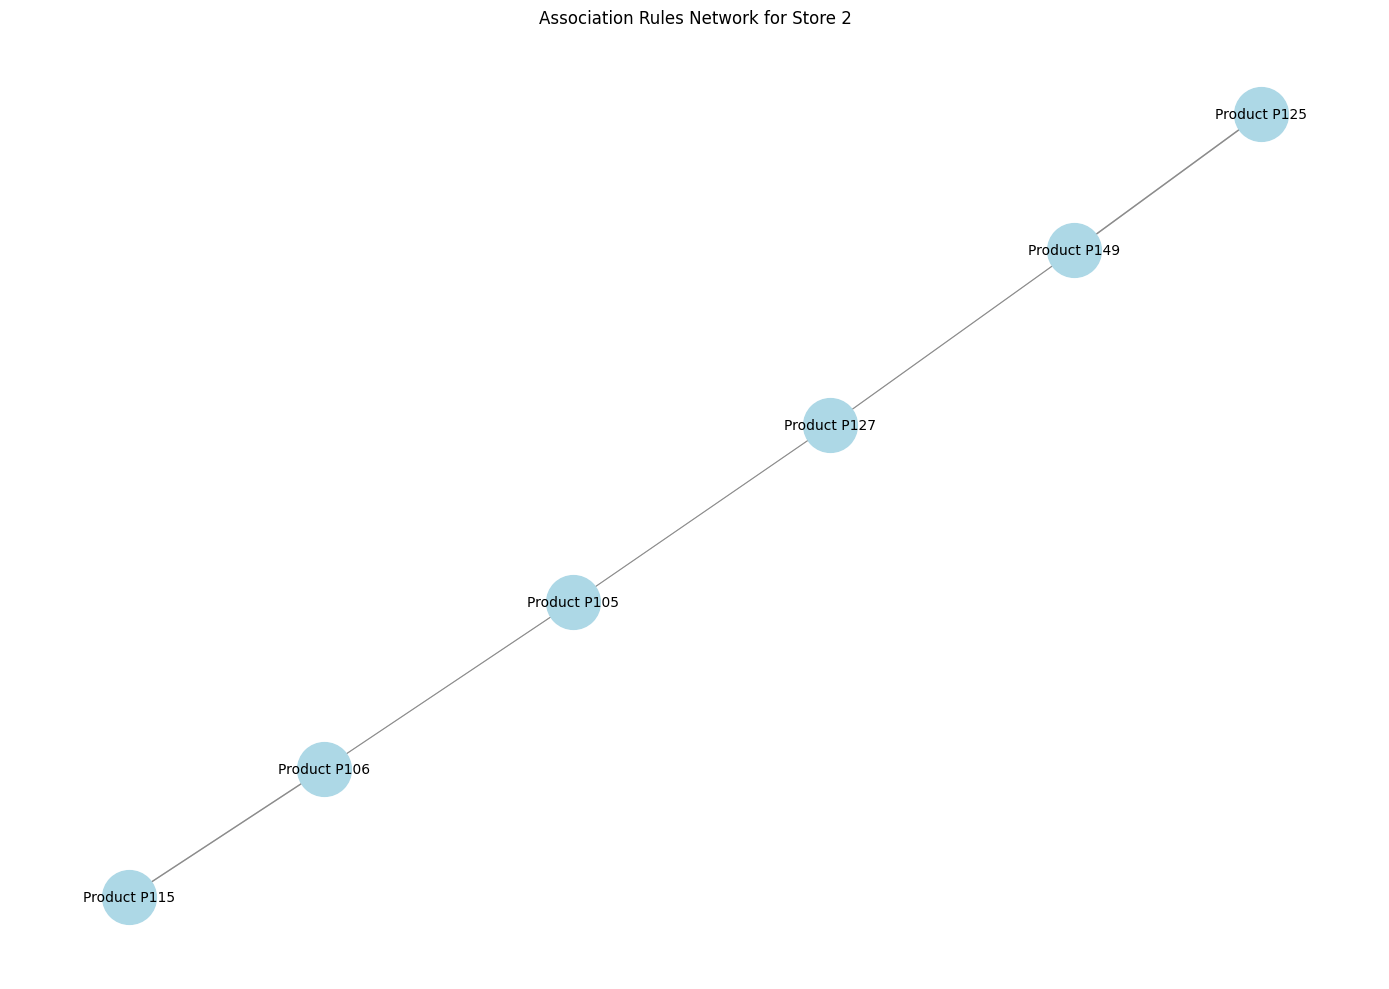

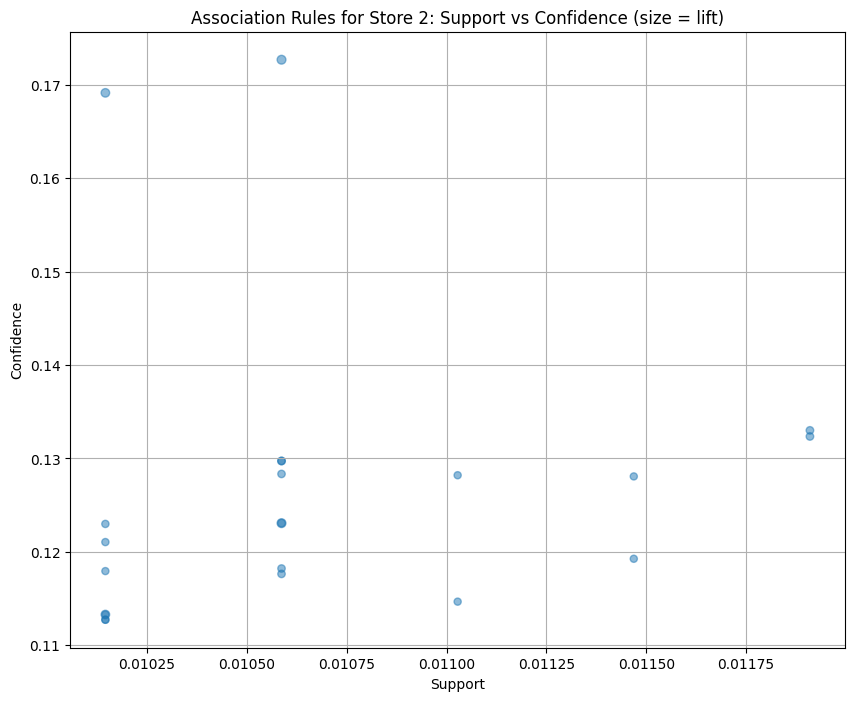


Top 10 Association Rules for Store 3:
   If customer buys They also buy   Support  Confidence      Lift
7      Product P138  Product P127  0.011472    0.181818  2.185998
6      Product P127  Product P138  0.011472    0.137931  2.185998
23     Product P119  Product P127  0.010038    0.161538  1.942175
22     Product P127  Product P119  0.010038    0.120690  1.942175
10     Product P115  Product P147  0.010994    0.160839  1.789763
11     Product P147  Product P115  0.010994    0.122340  1.789763
2      Product P105  Product P122  0.012906    0.132353  1.709150
3      Product P122  Product P105  0.012906    0.166667  1.709150
1      Product P106  Product P132  0.013384    0.153846  1.625486
0      Product P132  Product P106  0.013384    0.141414  1.625486


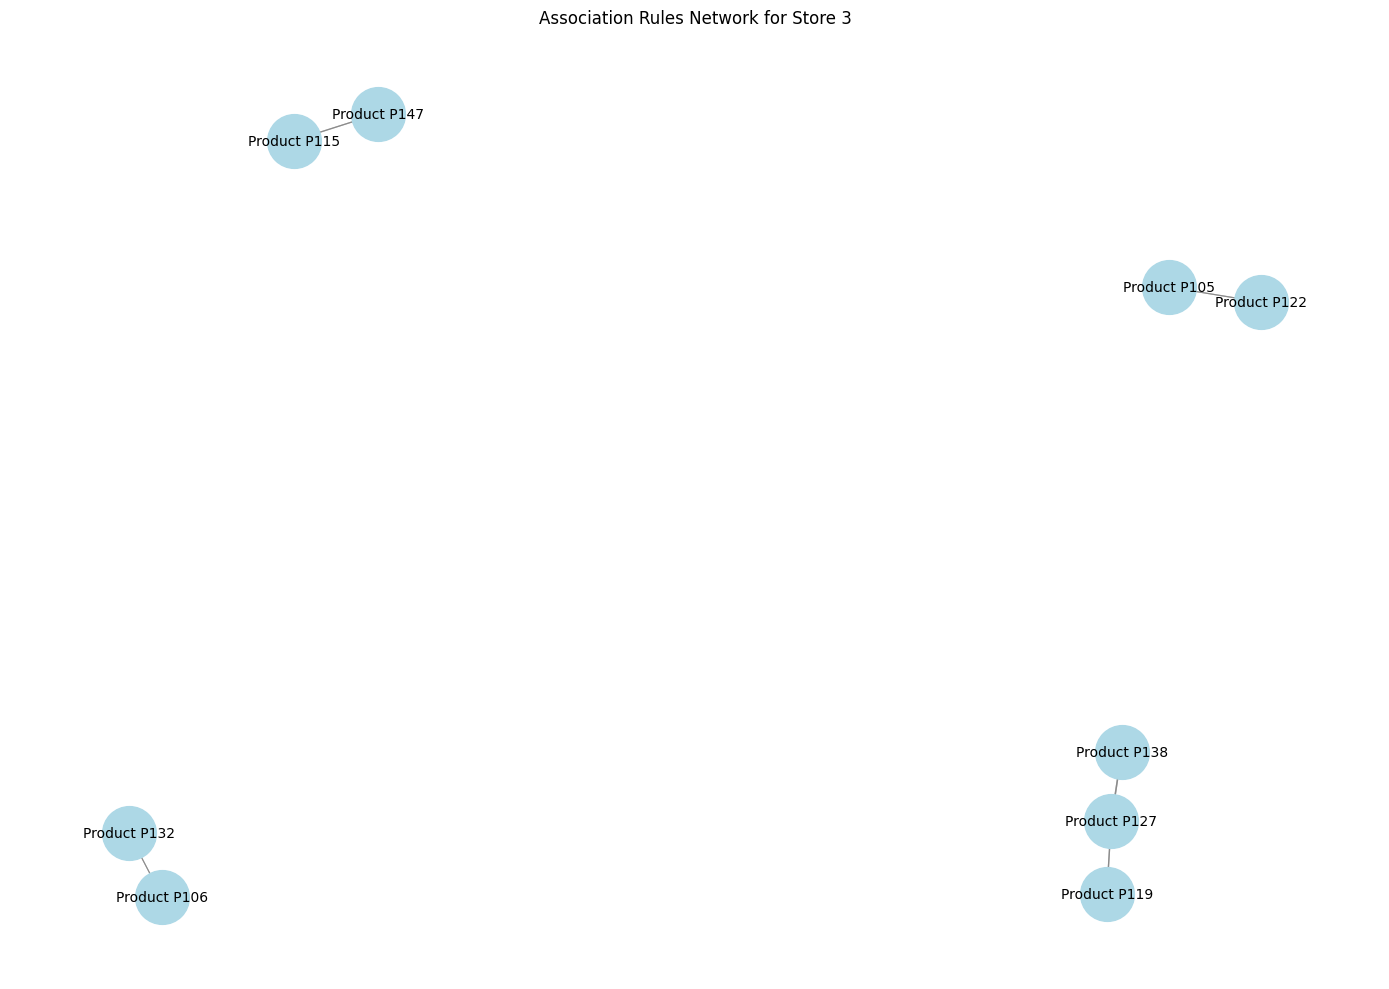

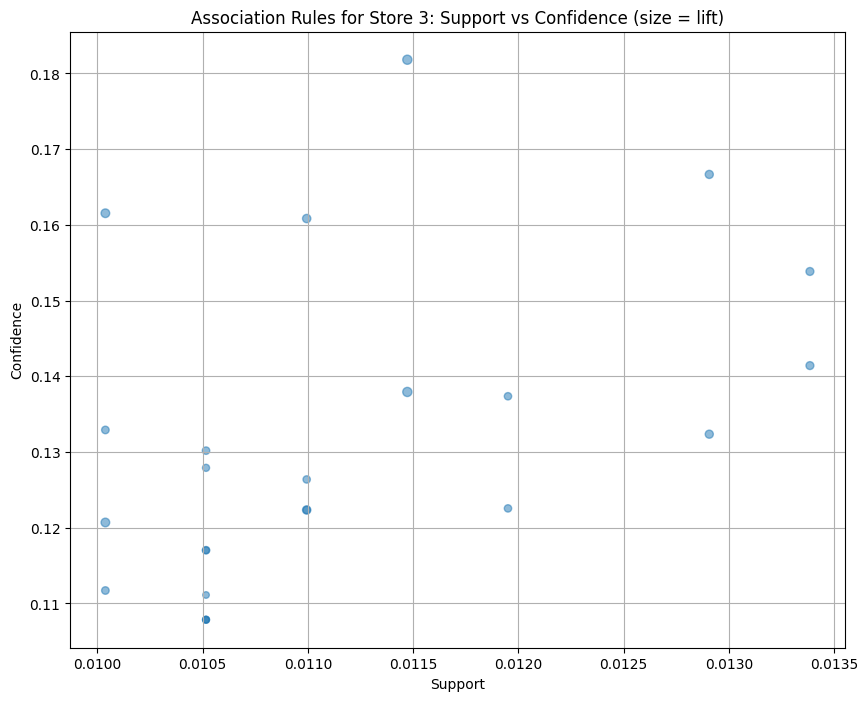


Top 10 Association Rules for Store 4:
  If customer buys They also buy   Support  Confidence      Lift
0     Product P117  Product P132  0.011616    0.147651  1.694855
1     Product P132  Product P117  0.011616    0.133333  1.694855
4     Product P115  Product P147  0.010560    0.142857  1.563997
5     Product P147  Product P115  0.010560    0.115607  1.563997
2     Product P144  Product P147  0.011088    0.128834  1.410476
3     Product P147  Product P144  0.011088    0.121387  1.410476
6     Product P117  Product P147  0.010032    0.127517  1.396051
7     Product P147  Product P117  0.010032    0.109827  1.396051
8     Product P144  Product P132  0.010032    0.116564  1.338018
9     Product P132  Product P144  0.010032    0.115152  1.338018


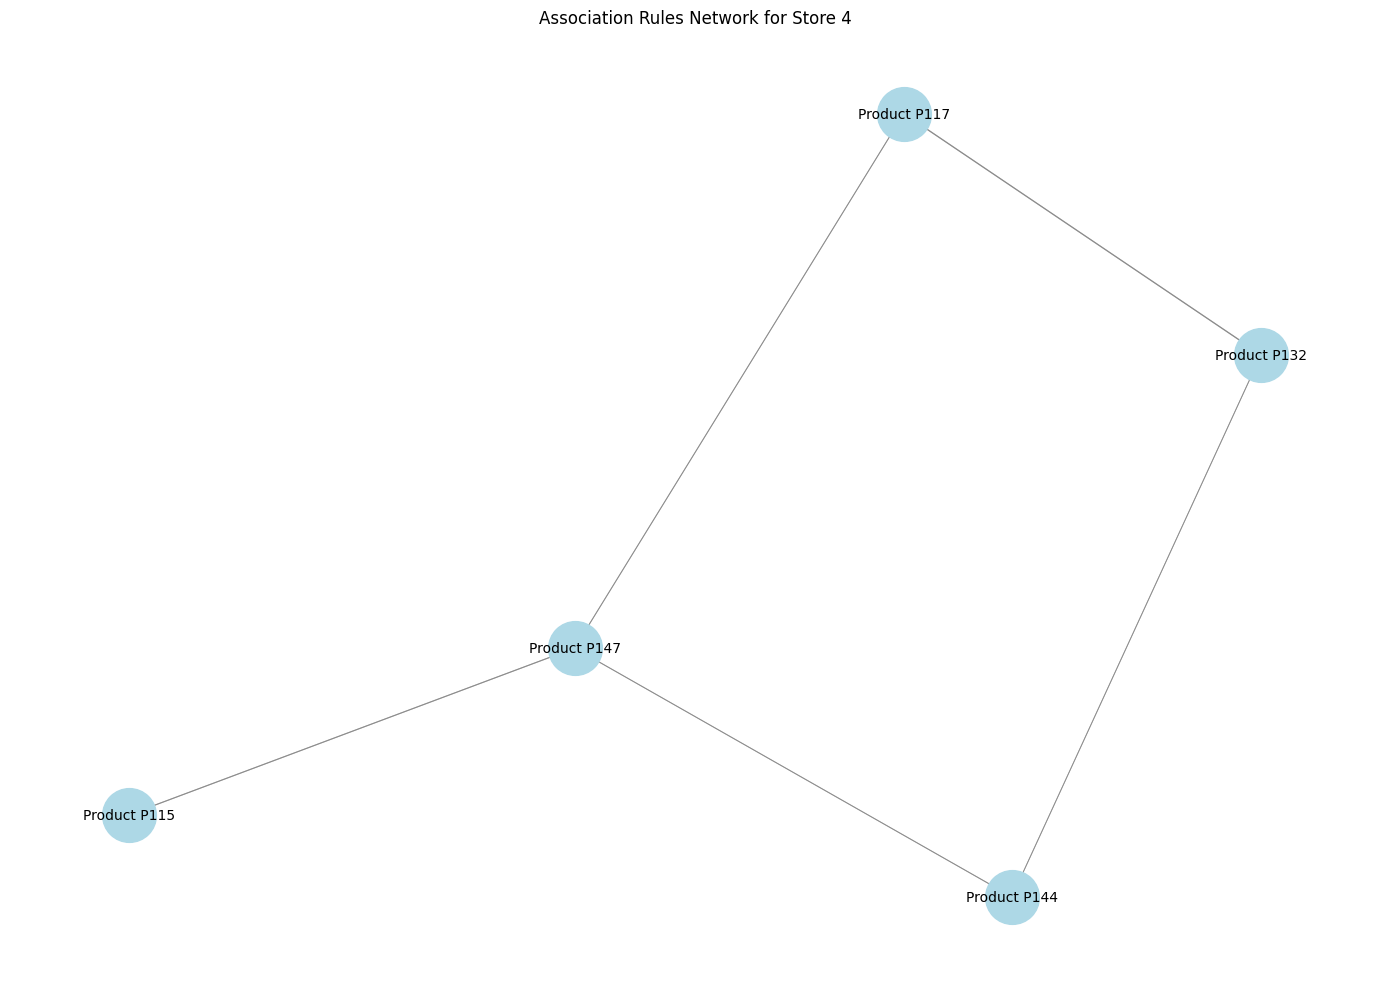

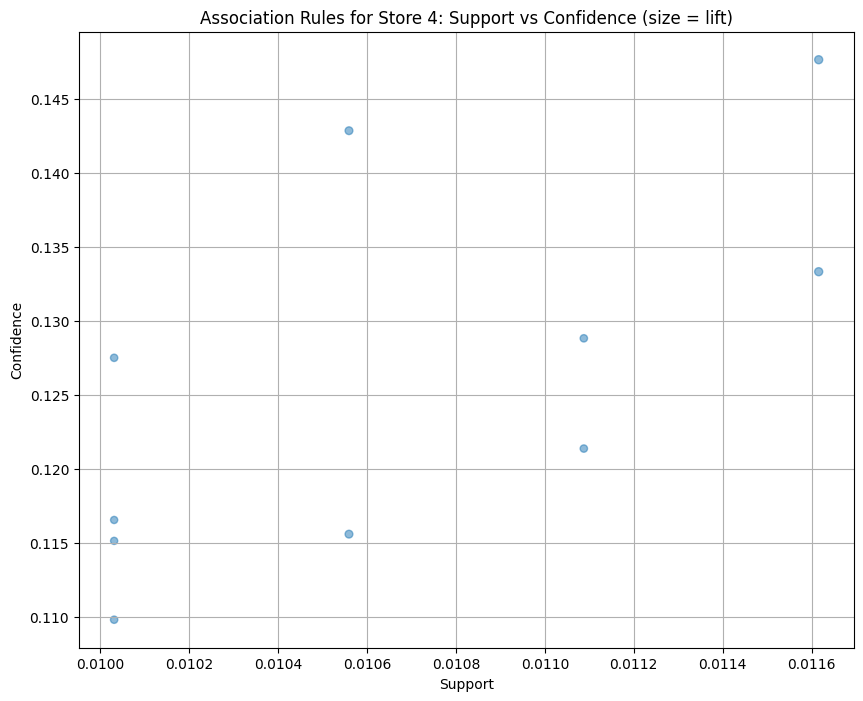


Top 10 Association Rules for Store 5:
   If customer buys They also buy   Support  Confidence      Lift
10     Product P105  Product P126  0.011068    0.132450  2.236801
11     Product P126  Product P105  0.011068    0.186916  2.236801
6      Product P138  Product P147  0.011621    0.176471  1.944405
7      Product P147  Product P138  0.011621    0.128049  1.944405
13     Product P115  Product P110  0.011068    0.152672  1.671987
12     Product P110  Product P115  0.011068    0.121212  1.671987
2      Product P108  Product P147  0.012728    0.144654  1.593841
3      Product P147  Product P108  0.012728    0.140244  1.593841
4      Product P132  Product P143  0.011621    0.115385  1.489286
5      Product P143  Product P132  0.011621    0.150000  1.489286


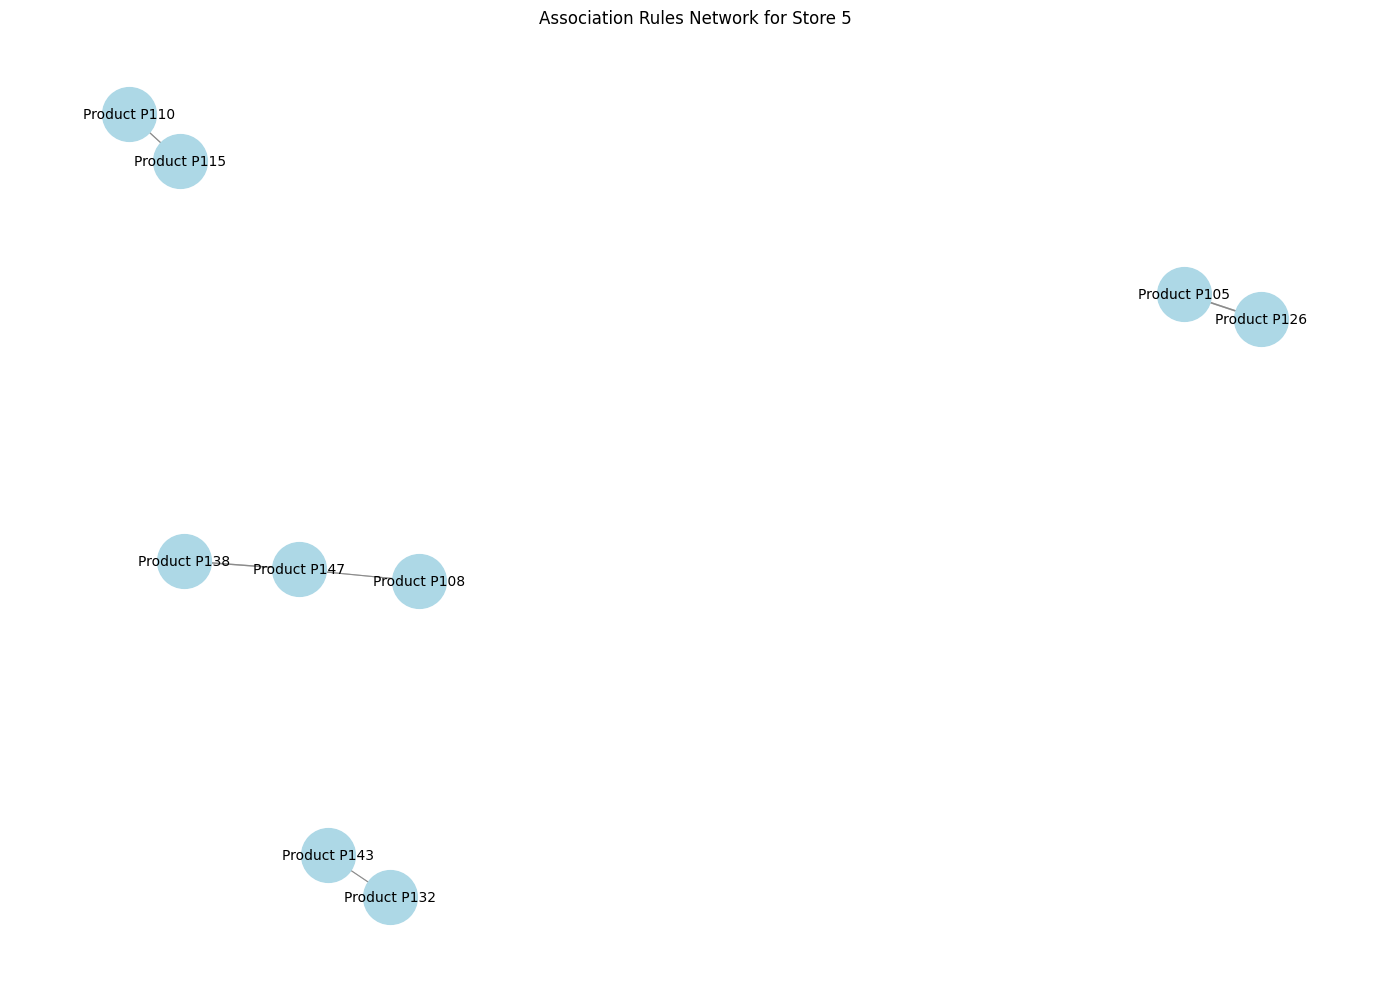

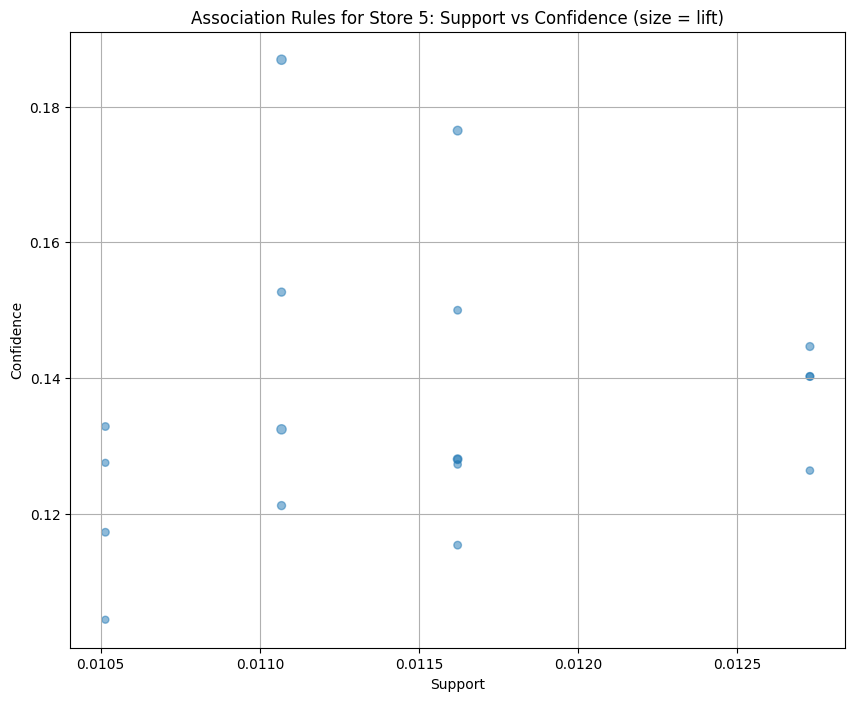


Top 10 Association Rules for Store 6:
   If customer buys They also buy   Support  Confidence      Lift
4      Product P117  Product P122  0.011443    0.145570  1.912385
5      Product P122  Product P117  0.011443    0.150327  1.912385
2      Product P117  Product P103  0.011443    0.145570  1.784115
3      Product P103  Product P117  0.011443    0.140244  1.784115
11     Product P105  Product P144  0.010448    0.134615  1.439239
10     Product P144  Product P105  0.010448    0.111702  1.439239
0      Product P144  Product P149  0.012935    0.138298  1.349411
1      Product P149  Product P144  0.012935    0.126214  1.349411
6      Product P103  Product P149  0.010945    0.134146  1.308904
7      Product P149  Product P103  0.010945    0.106796  1.308904


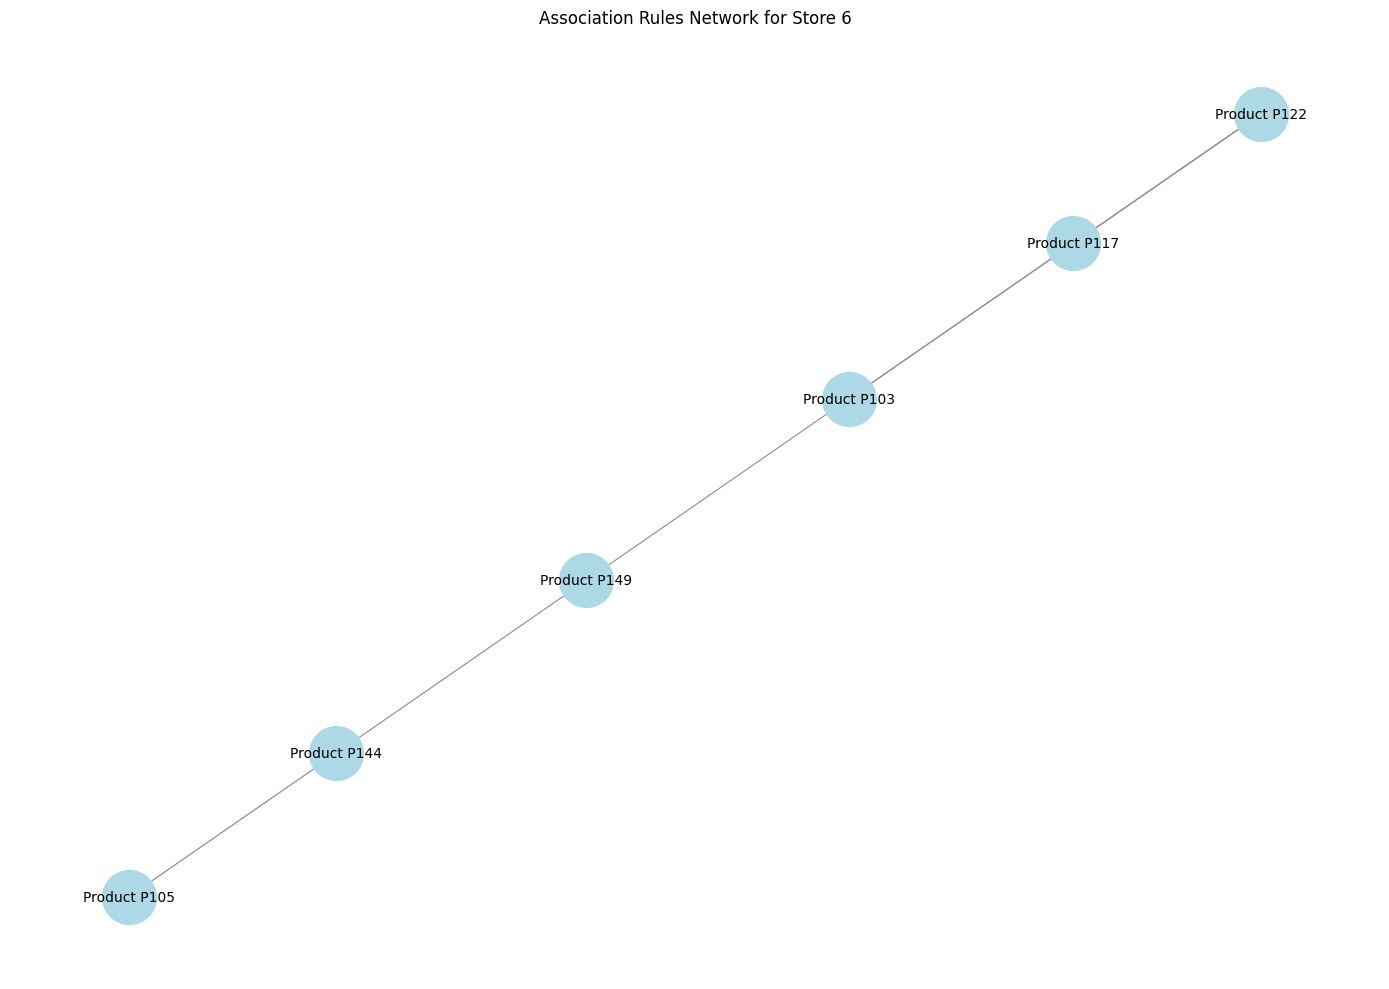

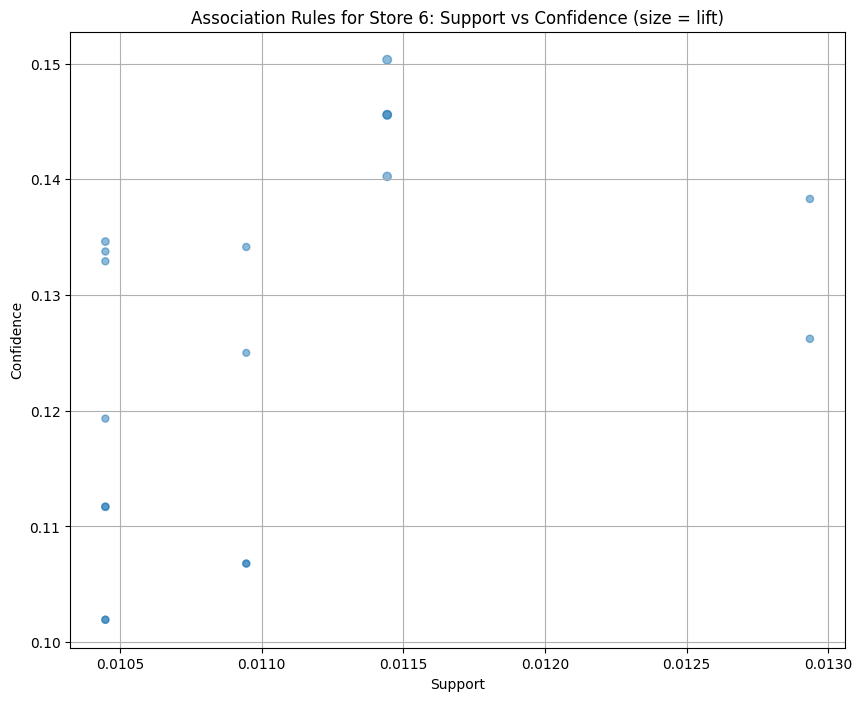


Top 10 Association Rules for Store 7:
   If customer buys They also buy   Support  Confidence      Lift
49     Product P119  Product P110  0.010056    0.178218  1.898868
48     Product P110  Product P119  0.010056    0.107143  1.898868
0      Product P110  Product P106  0.015084    0.160714  1.868043
1      Product P106  Product P110  0.015084    0.175325  1.868043
19     Product P130  Product P132  0.011732    0.170732  1.852180
18     Product P132  Product P130  0.011732    0.127273  1.852180
4      Product P105  Product P103  0.014525    0.149425  1.844629
5      Product P103  Product P105  0.014525    0.179310  1.844629
2      Product P117  Product P110  0.014525    0.172185  1.834595
3      Product P110  Product P117  0.014525    0.154762  1.834595


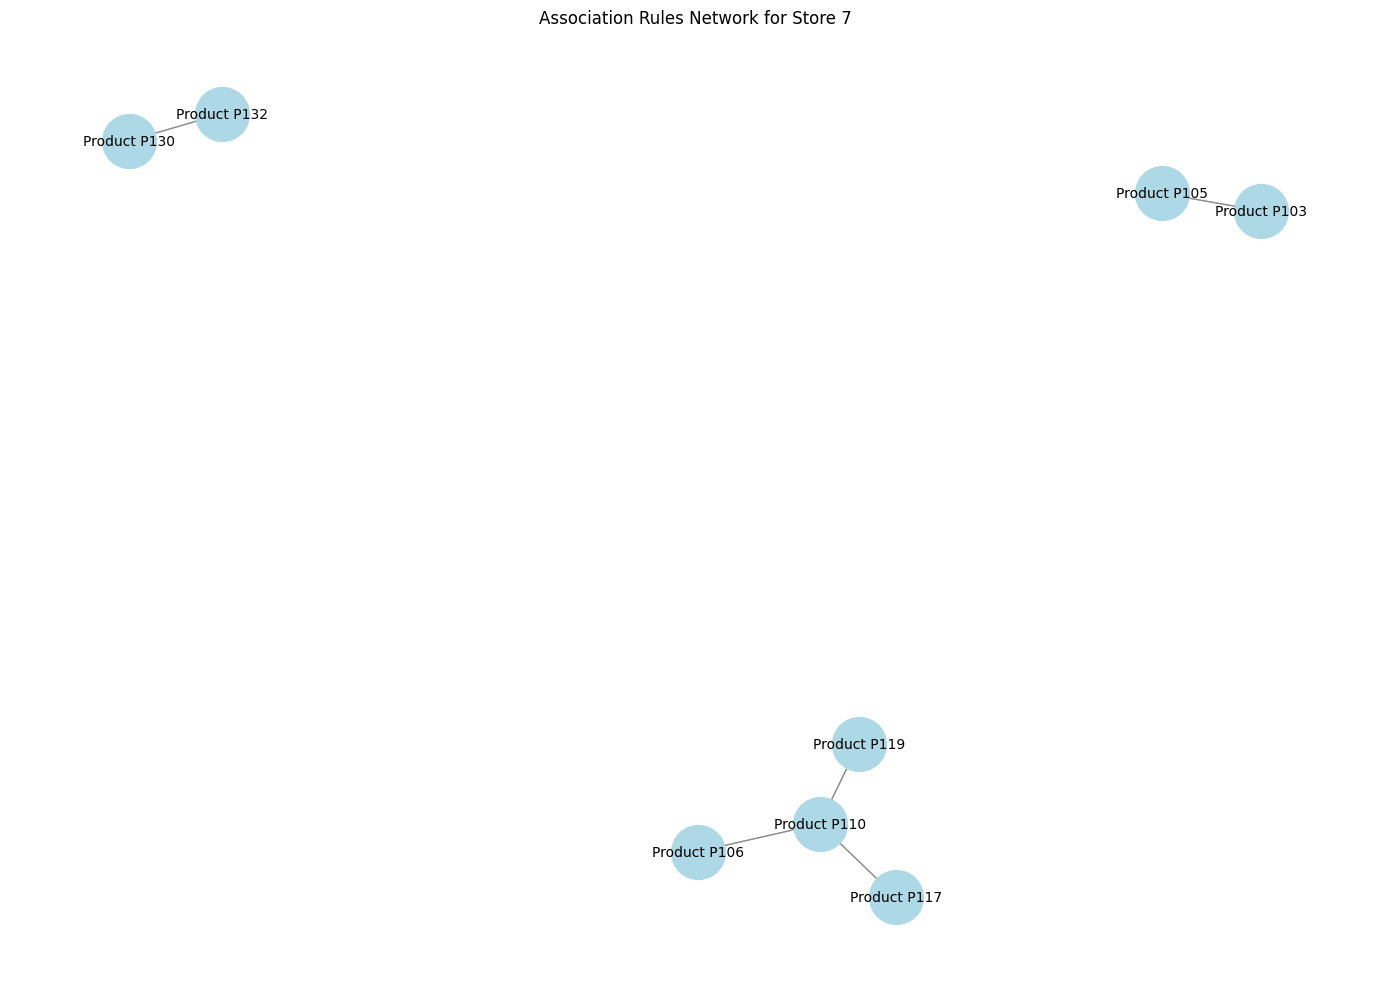

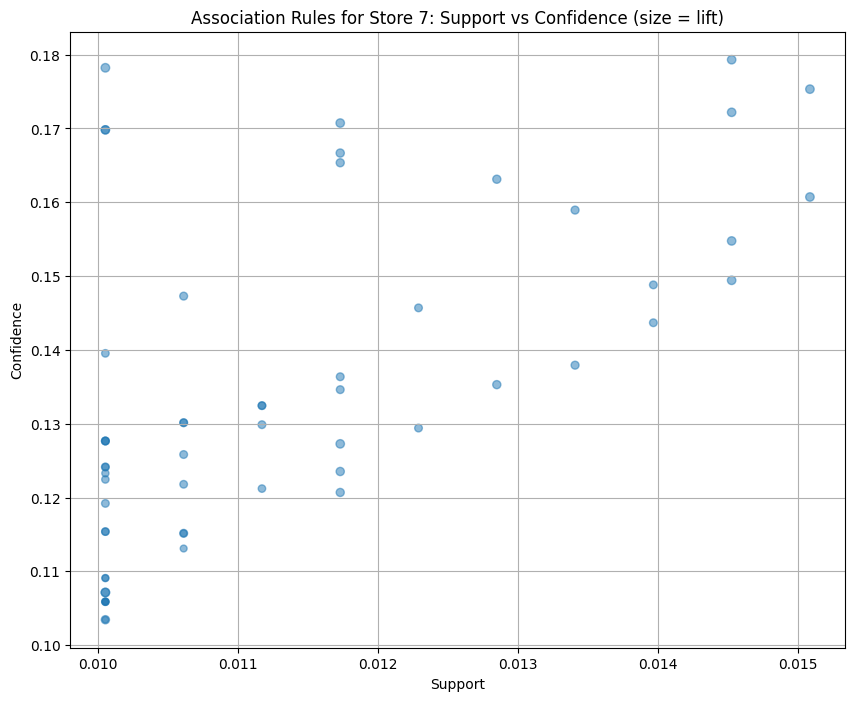


Top 10 Association Rules for Store 8:
   If customer buys They also buy   Support  Confidence      Lift
9      Product P141  Product P138  0.011820    0.156250  2.221639
8      Product P138  Product P141  0.011820    0.168067  2.221639
25     Product P104  Product P147  0.011229    0.197917  2.217715
24     Product P147  Product P104  0.011229    0.125828  2.217715
11     Product P144  Product P117  0.011820    0.137931  1.977791
10     Product P117  Product P144  0.011820    0.169492  1.977791
23     Product P130  Product P105  0.011229    0.172727  1.922727
22     Product P105  Product P130  0.011229    0.125000  1.922727
1      Product P103  Product P105  0.014184    0.172662  1.921999
0      Product P105  Product P103  0.014184    0.157895  1.921999


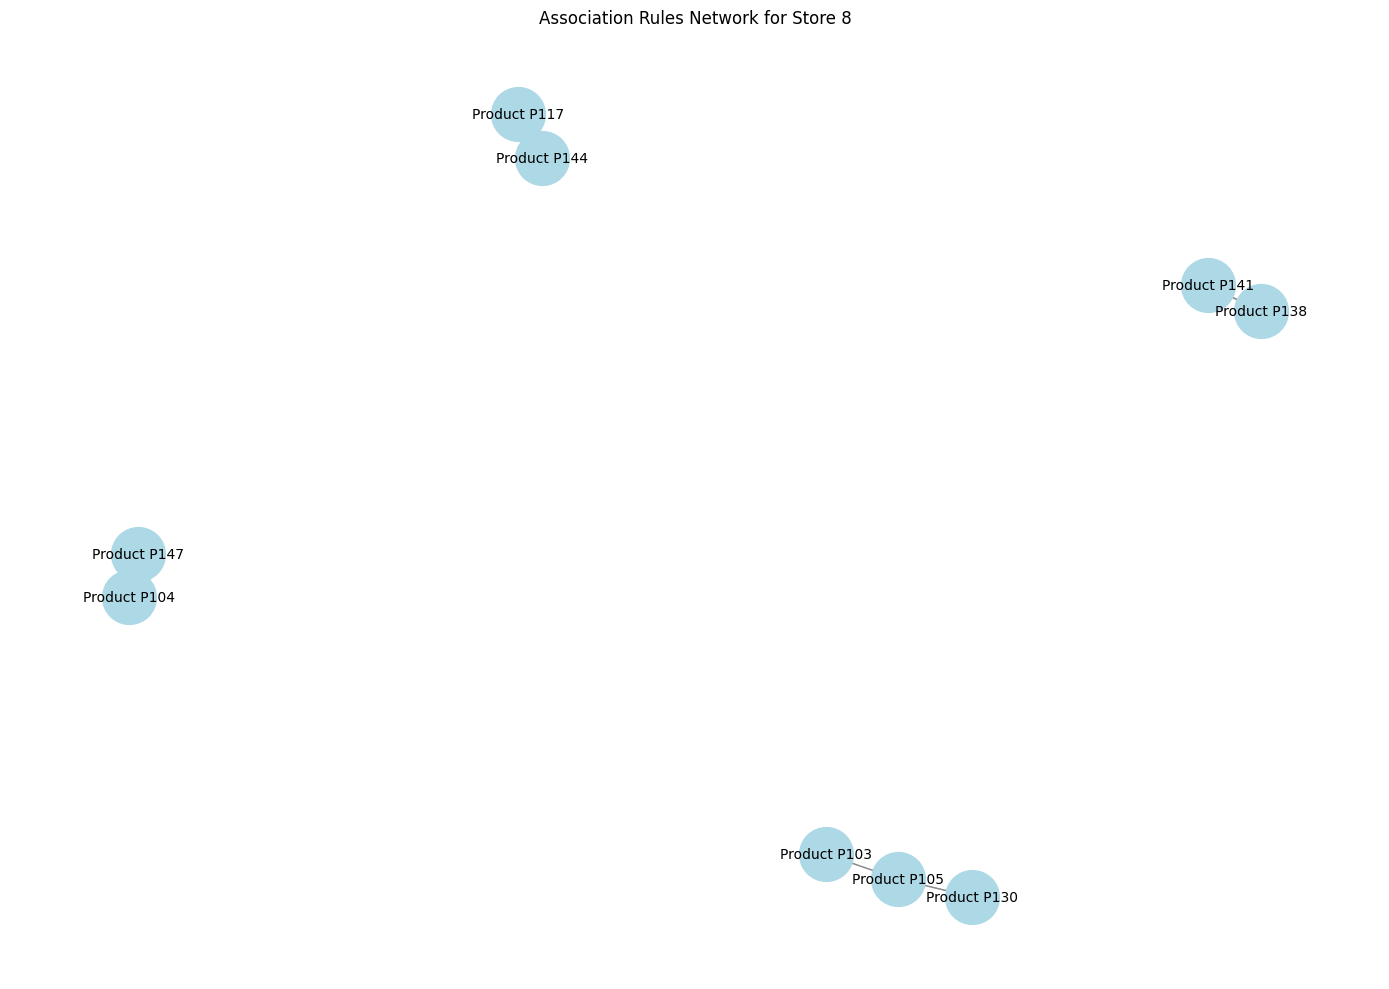

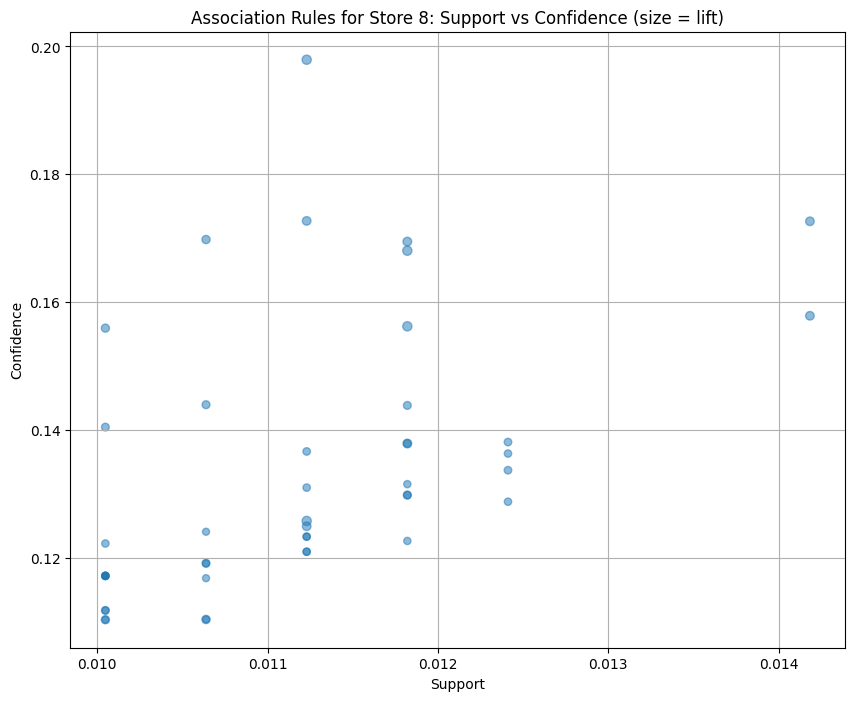

In [6]:
# Function to format itemsets for display
def format_itemset(itemset):
    return ', '.join(list(itemset))

# Function to visualize top rules for a store
def visualize_store_rules(store_id, top_n=10):
    rules = results[store_id]['rules']
    
    if rules.empty:
        print(f"No rules found for Store {store_id}")
        return
    
    # Add formatted columns for better readability
    rules['antecedents_str'] = rules['antecedents'].apply(format_itemset)
    rules['consequents_str'] = rules['consequents'].apply(format_itemset)
    
    # Display top rules
    top_rules = rules.head(top_n)[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']]
    top_rules.columns = ['If customer buys', 'They also buy', 'Support', 'Confidence', 'Lift']
    
    print(f"\nTop {top_n} Association Rules for Store {store_id}:")
    print(top_rules)
    
    # Visualize network graph for top rules
    if len(rules) >= 5:
        top_rules_vis = rules.head(min(10, len(rules)))
        
        # Create network graph
        G = nx.DiGraph()
        
        # Add nodes and edges
        for _, row in top_rules_vis.iterrows():
            antecedent = format_itemset(row['antecedents'])
            consequent = format_itemset(row['consequents'])
            
            # Add nodes
            if antecedent not in G.nodes:
                G.add_node(antecedent)
            if consequent not in G.nodes:
                G.add_node(consequent)
            
            # Add edge with lift as weight
            G.add_edge(antecedent, consequent, weight=row['lift'], 
                      support=row['support'], confidence=row['confidence'])
        
        # Plot the network
        plt.figure(figsize=(14, 10))
        pos = nx.spring_layout(G, seed=42)
        
        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
        
        # Draw edges with width based on lift
        edges = G.edges(data=True)
        edge_widths = [d['weight']/2 for u, v, d in edges]
        nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7, 
                              edge_color='grey', arrows=True, arrowsize=20)
        
        # Draw labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
        
        plt.axis('off')
        plt.title(f'Association Rules Network for Store {store_id}')
        plt.tight_layout()
        plt.show()
        
        # Scatter plot of rules
        plt.figure(figsize=(10, 8))
        plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*20, alpha=0.5)
        plt.xlabel('Support')
        plt.ylabel('Confidence')
        plt.title(f'Association Rules for Store {store_id}: Support vs Confidence (size = lift)')
        plt.grid(True)
        plt.show()

# Visualize results for each store
for store_id in results.keys():
    visualize_store_rules(store_id)

## Cross-Store Comparison

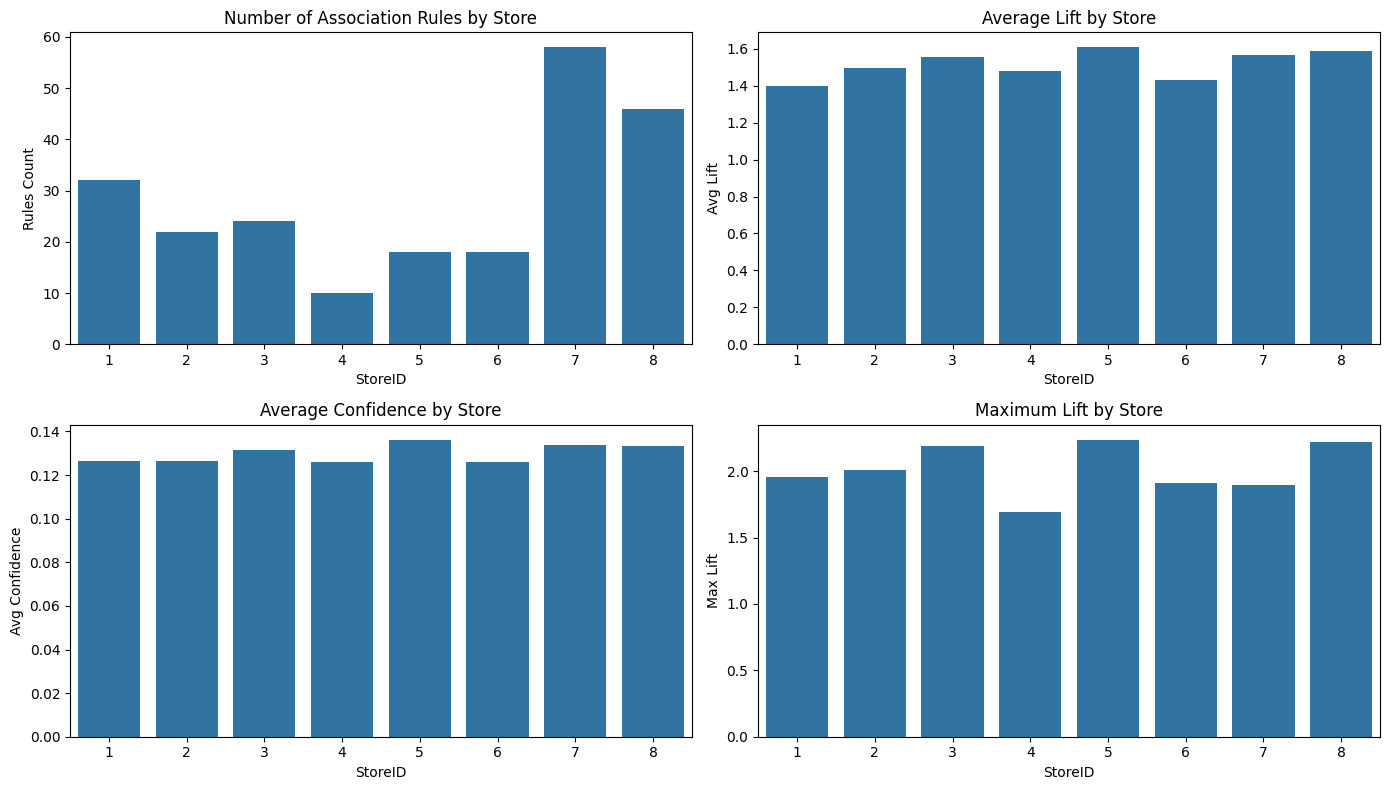


Store Comparison Metrics:
   StoreID  Rules Count  Avg Support  Avg Confidence  Avg Lift  Max Lift
0        1           32     0.011375        0.126280  1.396870  1.952184
1        2           22     0.010667        0.126422  1.495584  2.007305
2        3           24     0.011154        0.131643  1.553847  2.185998
3        4           10     0.010665        0.125873  1.480679  1.694855
4        5           18     0.011498        0.136225  1.608797  2.236801
5        6           18     0.011056        0.125936  1.432375  1.912385
6        7           58     0.011347        0.133821  1.566918  1.898868
7        8           46     0.011178        0.133408  1.587454  2.221639


In [7]:
# Compare performance metrics across stores
def compare_stores():
    comparison_data = []
    
    for store_id, data in results.items():
        rules = data['rules']
        if not rules.empty:
            avg_support = rules['support'].mean()
            avg_confidence = rules['confidence'].mean()
            avg_lift = rules['lift'].mean()
            num_rules = len(rules)
            max_lift = rules['lift'].max()
            
            comparison_data.append({
                'StoreID': store_id,
                'Rules Count': num_rules,
                'Avg Support': avg_support,
                'Avg Confidence': avg_confidence,
                'Avg Lift': avg_lift,
                'Max Lift': max_lift
            })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    if not comparison_df.empty:
        # Plot comparison
        plt.figure(figsize=(14, 8))
        
        # Rules count by store
        plt.subplot(2, 2, 1)
        sns.barplot(x='StoreID', y='Rules Count', data=comparison_df)
        plt.title('Number of Association Rules by Store')
        
        # Average lift by store
        plt.subplot(2, 2, 2)
        sns.barplot(x='StoreID', y='Avg Lift', data=comparison_df)
        plt.title('Average Lift by Store')
        
        # Average confidence by store
        plt.subplot(2, 2, 3)
        sns.barplot(x='StoreID', y='Avg Confidence', data=comparison_df)
        plt.title('Average Confidence by Store')
        
        # Max lift by store
        plt.subplot(2, 2, 4)
        sns.barplot(x='StoreID', y='Max Lift', data=comparison_df)
        plt.title('Maximum Lift by Store')
        
        plt.tight_layout()
        plt.show()
        
        return comparison_df
    else:
        print("No comparison data available")
        return pd.DataFrame()

# Run comparison
store_comparison = compare_stores()
print("\nStore Comparison Metrics:")
print(store_comparison)

## Generate Business Insights

In [8]:
from IPython.display import display, Markdown

# Function to generate insights for a store
def generate_store_insights(store_id):
    rules = results[store_id]['rules']
    
    if rules.empty:
        return f"No significant patterns found for Store {store_id}"
    
    # Top 3 rules by lift
    top_rules = rules.head(3)
    
    insights = f"""
## Business Insights for Store {store_id}

### Top Association Rules:
"""
    
    for i, (_, rule) in enumerate(top_rules.iterrows()):
        antecedent = format_itemset(rule['antecedents'])
        consequent = format_itemset(rule['consequents'])
        
        insights += f"""
{i+1}. If customers buy **{antecedent}**, they are {rule['lift']:.2f} times more likely to buy **{consequent}**
   - Support: {rule['support']:.2%} (appears in {rule['support']:.2%} of transactions)
   - Confidence: {rule['confidence']:.2%} ({rule['confidence']:.2%} of baskets with {antecedent} also contain {consequent})
"""
    
    insights += f"""
### Recommendations:
1. **Product Placement**: Place {format_itemset(top_rules.iloc[0]['antecedents'])} near {format_itemset(top_rules.iloc[0]['consequents'])}
2. **Bundling Opportunity**: Create a bundle of {format_itemset(top_rules.iloc[0]['antecedents'])} with {format_itemset(top_rules.iloc[0]['consequents'])}
3. **Cross-Selling**: Train staff to suggest {format_itemset(top_rules.iloc[1]['consequents'])} when customers purchase {format_itemset(top_rules.iloc[1]['antecedents'])}
"""
    
    return insights

# Generate insights for all stores
for store_id in results.keys():
    insights = generate_store_insights(store_id)
    display(Markdown(insights))


## Business Insights for Store 1

### Top Association Rules:

1. If customers buy **Product P144**, they are 1.95 times more likely to buy **Product P103**
   - Support: 1.42% (appears in 1.42% of transactions)
   - Confidence: 14.67% (14.67% of baskets with Product P144 also contain Product P103)

2. If customers buy **Product P103**, they are 1.95 times more likely to buy **Product P144**
   - Support: 1.42% (appears in 1.42% of transactions)
   - Confidence: 18.97% (18.97% of baskets with Product P103 also contain Product P144)

3. If customers buy **Product P108**, they are 1.77 times more likely to buy **Product P144**
   - Support: 1.42% (appears in 1.42% of transactions)
   - Confidence: 17.19% (17.19% of baskets with Product P108 also contain Product P144)

### Recommendations:
1. **Product Placement**: Place Product P144 near Product P103
2. **Bundling Opportunity**: Create a bundle of Product P144 with Product P103
3. **Cross-Selling**: Train staff to suggest Product P144 when customers purchase Product P103



## Business Insights for Store 2

### Top Association Rules:

1. If customers buy **Product P125**, they are 2.01 times more likely to buy **Product P149**
   - Support: 1.06% (appears in 1.06% of transactions)
   - Confidence: 17.27% (17.27% of baskets with Product P125 also contain Product P149)

2. If customers buy **Product P149**, they are 2.01 times more likely to buy **Product P125**
   - Support: 1.06% (appears in 1.06% of transactions)
   - Confidence: 12.31% (12.31% of baskets with Product P149 also contain Product P125)

3. If customers buy **Product P106**, they are 1.89 times more likely to buy **Product P115**
   - Support: 1.01% (appears in 1.01% of transactions)
   - Confidence: 11.33% (11.33% of baskets with Product P106 also contain Product P115)

### Recommendations:
1. **Product Placement**: Place Product P125 near Product P149
2. **Bundling Opportunity**: Create a bundle of Product P125 with Product P149
3. **Cross-Selling**: Train staff to suggest Product P125 when customers purchase Product P149



## Business Insights for Store 3

### Top Association Rules:

1. If customers buy **Product P138**, they are 2.19 times more likely to buy **Product P127**
   - Support: 1.15% (appears in 1.15% of transactions)
   - Confidence: 18.18% (18.18% of baskets with Product P138 also contain Product P127)

2. If customers buy **Product P127**, they are 2.19 times more likely to buy **Product P138**
   - Support: 1.15% (appears in 1.15% of transactions)
   - Confidence: 13.79% (13.79% of baskets with Product P127 also contain Product P138)

3. If customers buy **Product P119**, they are 1.94 times more likely to buy **Product P127**
   - Support: 1.00% (appears in 1.00% of transactions)
   - Confidence: 16.15% (16.15% of baskets with Product P119 also contain Product P127)

### Recommendations:
1. **Product Placement**: Place Product P138 near Product P127
2. **Bundling Opportunity**: Create a bundle of Product P138 with Product P127
3. **Cross-Selling**: Train staff to suggest Product P138 when customers purchase Product P127



## Business Insights for Store 4

### Top Association Rules:

1. If customers buy **Product P117**, they are 1.69 times more likely to buy **Product P132**
   - Support: 1.16% (appears in 1.16% of transactions)
   - Confidence: 14.77% (14.77% of baskets with Product P117 also contain Product P132)

2. If customers buy **Product P132**, they are 1.69 times more likely to buy **Product P117**
   - Support: 1.16% (appears in 1.16% of transactions)
   - Confidence: 13.33% (13.33% of baskets with Product P132 also contain Product P117)

3. If customers buy **Product P115**, they are 1.56 times more likely to buy **Product P147**
   - Support: 1.06% (appears in 1.06% of transactions)
   - Confidence: 14.29% (14.29% of baskets with Product P115 also contain Product P147)

### Recommendations:
1. **Product Placement**: Place Product P117 near Product P132
2. **Bundling Opportunity**: Create a bundle of Product P117 with Product P132
3. **Cross-Selling**: Train staff to suggest Product P117 when customers purchase Product P132



## Business Insights for Store 5

### Top Association Rules:

1. If customers buy **Product P105**, they are 2.24 times more likely to buy **Product P126**
   - Support: 1.11% (appears in 1.11% of transactions)
   - Confidence: 13.25% (13.25% of baskets with Product P105 also contain Product P126)

2. If customers buy **Product P126**, they are 2.24 times more likely to buy **Product P105**
   - Support: 1.11% (appears in 1.11% of transactions)
   - Confidence: 18.69% (18.69% of baskets with Product P126 also contain Product P105)

3. If customers buy **Product P138**, they are 1.94 times more likely to buy **Product P147**
   - Support: 1.16% (appears in 1.16% of transactions)
   - Confidence: 17.65% (17.65% of baskets with Product P138 also contain Product P147)

### Recommendations:
1. **Product Placement**: Place Product P105 near Product P126
2. **Bundling Opportunity**: Create a bundle of Product P105 with Product P126
3. **Cross-Selling**: Train staff to suggest Product P105 when customers purchase Product P126



## Business Insights for Store 6

### Top Association Rules:

1. If customers buy **Product P117**, they are 1.91 times more likely to buy **Product P122**
   - Support: 1.14% (appears in 1.14% of transactions)
   - Confidence: 14.56% (14.56% of baskets with Product P117 also contain Product P122)

2. If customers buy **Product P122**, they are 1.91 times more likely to buy **Product P117**
   - Support: 1.14% (appears in 1.14% of transactions)
   - Confidence: 15.03% (15.03% of baskets with Product P122 also contain Product P117)

3. If customers buy **Product P117**, they are 1.78 times more likely to buy **Product P103**
   - Support: 1.14% (appears in 1.14% of transactions)
   - Confidence: 14.56% (14.56% of baskets with Product P117 also contain Product P103)

### Recommendations:
1. **Product Placement**: Place Product P117 near Product P122
2. **Bundling Opportunity**: Create a bundle of Product P117 with Product P122
3. **Cross-Selling**: Train staff to suggest Product P117 when customers purchase Product P122



## Business Insights for Store 7

### Top Association Rules:

1. If customers buy **Product P119**, they are 1.90 times more likely to buy **Product P110**
   - Support: 1.01% (appears in 1.01% of transactions)
   - Confidence: 17.82% (17.82% of baskets with Product P119 also contain Product P110)

2. If customers buy **Product P110**, they are 1.90 times more likely to buy **Product P119**
   - Support: 1.01% (appears in 1.01% of transactions)
   - Confidence: 10.71% (10.71% of baskets with Product P110 also contain Product P119)

3. If customers buy **Product P110**, they are 1.87 times more likely to buy **Product P106**
   - Support: 1.51% (appears in 1.51% of transactions)
   - Confidence: 16.07% (16.07% of baskets with Product P110 also contain Product P106)

### Recommendations:
1. **Product Placement**: Place Product P119 near Product P110
2. **Bundling Opportunity**: Create a bundle of Product P119 with Product P110
3. **Cross-Selling**: Train staff to suggest Product P119 when customers purchase Product P110



## Business Insights for Store 8

### Top Association Rules:

1. If customers buy **Product P141**, they are 2.22 times more likely to buy **Product P138**
   - Support: 1.18% (appears in 1.18% of transactions)
   - Confidence: 15.62% (15.62% of baskets with Product P141 also contain Product P138)

2. If customers buy **Product P138**, they are 2.22 times more likely to buy **Product P141**
   - Support: 1.18% (appears in 1.18% of transactions)
   - Confidence: 16.81% (16.81% of baskets with Product P138 also contain Product P141)

3. If customers buy **Product P104**, they are 2.22 times more likely to buy **Product P147**
   - Support: 1.12% (appears in 1.12% of transactions)
   - Confidence: 19.79% (19.79% of baskets with Product P104 also contain Product P147)

### Recommendations:
1. **Product Placement**: Place Product P141 near Product P138
2. **Bundling Opportunity**: Create a bundle of Product P141 with Product P138
3. **Cross-Selling**: Train staff to suggest Product P141 when customers purchase Product P138


## Category-Based Analysis


Top Category Association Rules:
  If customer buys from    They also buy from   Support  Confidence      Lift
0                 Books               Apparel  0.105922    0.248717  1.004180
1               Apparel                 Books  0.105922    0.427654  1.004180
2        Books, Grocery           Electronics  0.105260    0.642020  1.110060
3    Books, Electronics               Grocery  0.105260    0.458718  1.150301
4  Electronics, Grocery                 Books  0.105260    0.496407  1.165619
5                 Books  Electronics, Grocery  0.105260    0.247161  1.165619
6               Grocery    Books, Electronics  0.105260    0.263953  1.150301
7           Electronics        Books, Grocery  0.105260    0.181995  1.110060
8               Grocery               Apparel  0.100556    0.252159  1.018080
9               Apparel               Grocery  0.100556    0.405991  1.018080


C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_8588\886073228.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


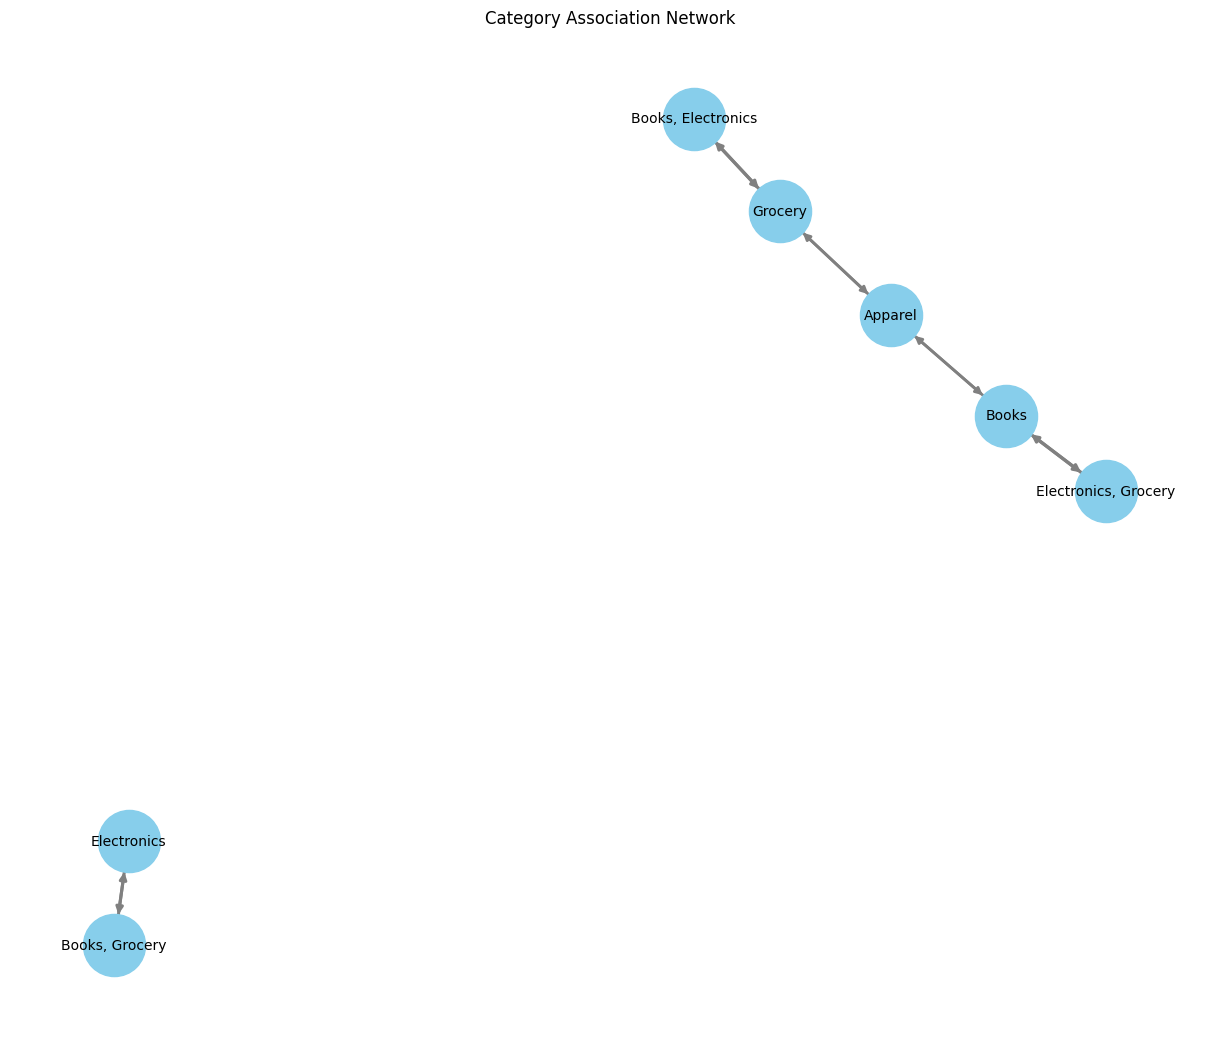

In [9]:
# Function to perform category-level market basket analysis
def category_level_analysis():
    # Create a list of transactions at category level
    category_transactions = df['ProductCategory'].tolist()
    
    # Encode the transactions
    te = TransactionEncoder()
    te_ary = te.fit(category_transactions).transform(category_transactions)
    category_df = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Apply Apriori
    frequent_categories = apriori(category_df, min_support=0.02, use_colnames=True)
    
    if not frequent_categories.empty:
        frequent_categories['length'] = frequent_categories['itemsets'].apply(lambda x: len(x))
        frequent_categories = frequent_categories.sort_values('support', ascending=False)
        
        # Generate rules
        category_rules = association_rules(frequent_categories, metric="lift", min_threshold=1.0)
        
        if not category_rules.empty:
            # Format for display
            category_rules['antecedents_str'] = category_rules['antecedents'].apply(format_itemset)
            category_rules['consequents_str'] = category_rules['consequents'].apply(format_itemset)
            
            # Display top category rules
            top_cat_rules = category_rules.head(10)[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']]
            top_cat_rules.columns = ['If customer buys from', 'They also buy from', 'Support', 'Confidence', 'Lift']
            
            print("\nTop Category Association Rules:")
            print(top_cat_rules)
            
            # Visualize category relationships
            plt.figure(figsize=(12, 10))
            
            # Create graph
            G = nx.DiGraph()
            
            # Add nodes and edges for top 10 rules
            for _, row in category_rules.head(10).iterrows():
                antecedent = format_itemset(row['antecedents'])
                consequent = format_itemset(row['consequents'])
                
                if antecedent not in G.nodes:
                    G.add_node(antecedent)
                if consequent not in G.nodes:
                    G.add_node(consequent)
                
                G.add_edge(antecedent, consequent, weight=row['lift'])
            
            # Draw graph
            pos = nx.spring_layout(G, seed=42)
            edges = G.edges(data=True)
            weights = [d['weight']*2 for _, _, d in edges]
            
            nx.draw(G, pos, with_labels=True, node_color='skyblue', 
                   node_size=2000, edge_color='gray', width=weights, 
                   edge_cmap=plt.cm.Blues, font_size=10)
            
            plt.title('Category Association Network')
            plt.axis('off')
            plt.tight_layout()
            plt.show()
            
            return category_rules
    
    print("No significant category associations found")
    return pd.DataFrame()

# Run category analysis
category_rules = category_level_analysis()

## Conclusion and Recommendations

In [10]:
# Generate overall recommendations
def generate_overall_recommendations():
    # Compare store performance
    if not store_comparison.empty:
        best_store = store_comparison.loc[store_comparison['Avg Lift'].idxmax()]['StoreID']
        worst_store = store_comparison.loc[store_comparison['Avg Lift'].idxmin()]['StoreID']
    else:
        best_store = "N/A"
        worst_store = "N/A"
    
    # Collect top rules across all stores
    all_top_rules = []
    for store_id, data in results.items():
        if not data['rules'].empty:
            top_rule = data['rules'].iloc[0]
            all_top_rules.append((store_id, top_rule))
    
    recommendations = f"""
## Overall Recommendations from Market Basket Analysis

### Store Performance:
- Store {best_store} shows the strongest product associations
- Store {worst_store} shows the weakest associations and may need merchandising adjustments

### Cross-Store Opportunities:
"""
    
    if all_top_rules:
        recommendations += "#### Top product associations by store:\n"
        for store_id, rule in all_top_rules:
            antecedent = format_itemset(rule['antecedents'])
            consequent = format_itemset(rule['consequents'])
            recommendations += f"- Store {store_id}: {antecedent} → {consequent} (Lift: {rule['lift']:.2f})\n"
    
    recommendations += """
### Implementation Strategy:
1. **Store Layout Optimization**:
   - Reorganize product placements based on discovered associations
   - Create "customer journey" paths that follow frequent purchase patterns

2. **Targeted Marketing Campaigns**:
   - Develop store-specific promotions based on unique association patterns
   - Create bundled offerings of frequently co-purchased items

3. **Inventory Management**:
   - Ensure complementary products are stocked together
   - Adjust inventory levels based on association strengths

4. **Staff Training**:
   - Educate staff on cross-selling opportunities specific to each store
   - Implement suggestive selling based on top association rules

5. **Further Analysis**:
   - Conduct temporal analysis to identify seasonal patterns
   - Segment customers and analyze basket patterns by segment
   - Implement A/B testing to validate recommendations
"""
    
    return recommendations

# Generate and print overall recommendations
overall_recommendations = generate_overall_recommendations()
display(Markdown(overall_recommendations))


## Overall Recommendations from Market Basket Analysis

### Store Performance:
- Store 5.0 shows the strongest product associations
- Store 1.0 shows the weakest associations and may need merchandising adjustments

### Cross-Store Opportunities:
#### Top product associations by store:
- Store 1: Product P144 → Product P103 (Lift: 1.95)
- Store 2: Product P125 → Product P149 (Lift: 2.01)
- Store 3: Product P138 → Product P127 (Lift: 2.19)
- Store 4: Product P117 → Product P132 (Lift: 1.69)
- Store 5: Product P105 → Product P126 (Lift: 2.24)
- Store 6: Product P117 → Product P122 (Lift: 1.91)
- Store 7: Product P119 → Product P110 (Lift: 1.90)
- Store 8: Product P141 → Product P138 (Lift: 2.22)

### Implementation Strategy:
1. **Store Layout Optimization**:
   - Reorganize product placements based on discovered associations
   - Create "customer journey" paths that follow frequent purchase patterns

2. **Targeted Marketing Campaigns**:
   - Develop store-specific promotions based on unique association patterns
   - Create bundled offerings of frequently co-purchased items

3. **Inventory Management**:
   - Ensure complementary products are stocked together
   - Adjust inventory levels based on association strengths

4. **Staff Training**:
   - Educate staff on cross-selling opportunities specific to each store
   - Implement suggestive selling based on top association rules

5. **Further Analysis**:
   - Conduct temporal analysis to identify seasonal patterns
   - Segment customers and analyze basket patterns by segment
   - Implement A/B testing to validate recommendations
